```
     _                                     ____             _       _   ____                                    
    / \   _ __ ___   __ _ _______  _ __   / ___|  ___   ___(_) __ _| | |  _ \ _ __ ___   __ _ _ __ ___  ___ ___ 
   / _ \ | '_ ` _ \ / _` |_  / _ \| '_ \  \___ \ / _ \ / __| |/ _` | | | |_) | '__/ _ \ / _` | '__/ _ \/ __/ __|
  / ___ \| | | | | | (_| |/ / (_) | | | |  ___) | (_) | (__| | (_| | | |  __/| | | (_) | (_| | | |  __/\__ \__ \
 /_/   \_\_| |_| |_|\__,_/___\___/|_| |_| |____/ \___/ \___|_|\__,_|_| |_|   |_|  \___/ \__, |_|  \___||___/___/
                                                                                        |___/                   
```


### Module
Data Exploration

### Goal
Exploring classification label data by visualization tools.

### Tools
1. Pandas
1. Matplotlib
2. Seaborn

### Requirement
1. File Definition
2. Data Preparation
3. hotspot_spi.csv generated
 
### Data Source
__${WORKDIR}__/data/ouptut/hotspot_spi.csv


In [1]:
import os
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Constants

In [2]:
WORKDIR = os.path.abspath(os.getcwd())
YEARS_AVAILABLE = [2014, 2018, 2021]

## Get the data

__Load into Pandas DataFrame__

In [3]:
file = ''.join([WORKDIR, "/data/output/hotspot_spi.csv"]) 
dataset = pd.read_csv(file)
dataset.head()

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,indrisco,indriscocat,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
0,2014,ACRE,ACRELANDIA,0.9,0.35,0.23,0.0,425,101.45,Q2,...,26.77,288.91,12.27,0.00,1.0,29.60,22.32,2.0,13.81,7.35
1,2014,ACRE,ASSIS BRASIL,1.7,0.46,0.15,0.0,315,49.85,Q2,...,36.22,201.25,17.35,1.88,2.0,58.91,80.48,3.0,8.17,4.54
2,2014,ACRE,BRASILEIA,1.4,0.38,0.19,0.0,1077,215.57,Q3,...,31.08,144.83,20.11,40.00,5.0,300.00,683.19,5.0,9.97,6.59
3,2014,ACRE,BUJARI,0.8,0.38,0.12,0.0,326,42.26,Q2,...,34.30,824.47,16.12,0.00,1.0,45.11,32.66,2.0,12.97,9.16
4,2014,ACRE,CAPIXABA,0.8,0.11,0.08,0.0,435,40.75,Q2,...,32.05,172.42,26.07,0.00,1.0,0.00,0.00,1.0,11.60,7.08


## Visualize the data

In [4]:
def get_inds_groupedby_year_and_cat(indicators):
    df = dataset.groupby(by=["ano", "indriscocat"])[indicators].mean().round(1).reset_index()
    df_pivot = df.pivot(index="ano", columns="indriscocat", values=indicators)
    return df_pivot

In [5]:
def plot_indicators(data, indicators):
    for idx, ind in enumerate(indicators):
        plt.scatter(data.index, data[ind], label=ind, s=100, ec="white", zorder=2)
        plt.plot(data.index, data[ind])
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

In [6]:
def plot_label_x_features(features_names, plot_title):
    index_order = ["Q1", "Q2", "Q3", "Q4"]
    
    cols = 3
    rows = math.ceil(len(YEARS_AVAILABLE) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(25, 5), constrained_layout=True)   
    fig.suptitle(plot_title, fontsize="xx-large", fontweight='heavy')

    for idx, ax in enumerate(axes):
        year = YEARS_AVAILABLE[idx]
        yeardf = dataset[dataset["ano"] == year]

        features = yeardf[features_names]
        data = features.groupby(by="indriscocat").mean().round(2)
        data = data.reindex(index_order)

        ax.set_title(year, fontdict={'fontsize': 16})
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")

        # Remove axes splines
        for spin in ['top', 'left', 'right']:
            ax.spines[spin].set_visible(False)

        for i, col in enumerate(data.columns):
            ax.scatter(data.index, data[col], label=col, s=100, ec="white", zorder=2)
            ax.plot(data.index, data[col])
            ax.legend(bbox_to_anchor=(1, 1), loc="upper left")

In [7]:
def plot_dot_cat_item(dataset, cat_label, item_label):
    """
    The dot plot conveys the rank order of the items. And since it is aligned along the horizontal
    axis, you can visualize how far the points are from each other more easily.
    """
    dataframe = dataset.groupby(by=[cat_label])[item_label].mean()
    
    # Draw plot
    fig, ax = plt.subplots(figsize=(10,5), dpi= 80)
    ax.hlines(y=dataframe.index, xmin=dataframe.min(), xmax=dataframe.max(), color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
    ax.scatter(y=dataframe.index, x=dataframe, s=75, color='firebrick', alpha=0.7)

    # Title, Label, Ticks and Ylim
    ax.set_title("Category Item Dot Plot ", fontdict={'size':22})
    ax.set_xlabel(item_label)
    ax.set_yticks(dataframe.index)
    plt.show()

In [8]:
def plot_pairwise(dataset, hue, hue_order=[]):
    """
    Pairwise plot is a favorite in exploratory analysis to understand the
    relationship between all possible pairs of numeric variables. It is a
    must have tool for bivariate analysis.
    """
    plt.figure(figsize=(30,8), dpi=80)
    g=sns.pairplot(dataset, kind="scatter", hue=hue, hue_order=hue_order, plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
    g.fig.set_size_inches(9, 7)
    plt.show()

__Risk Fire vs IPS Amazônia__

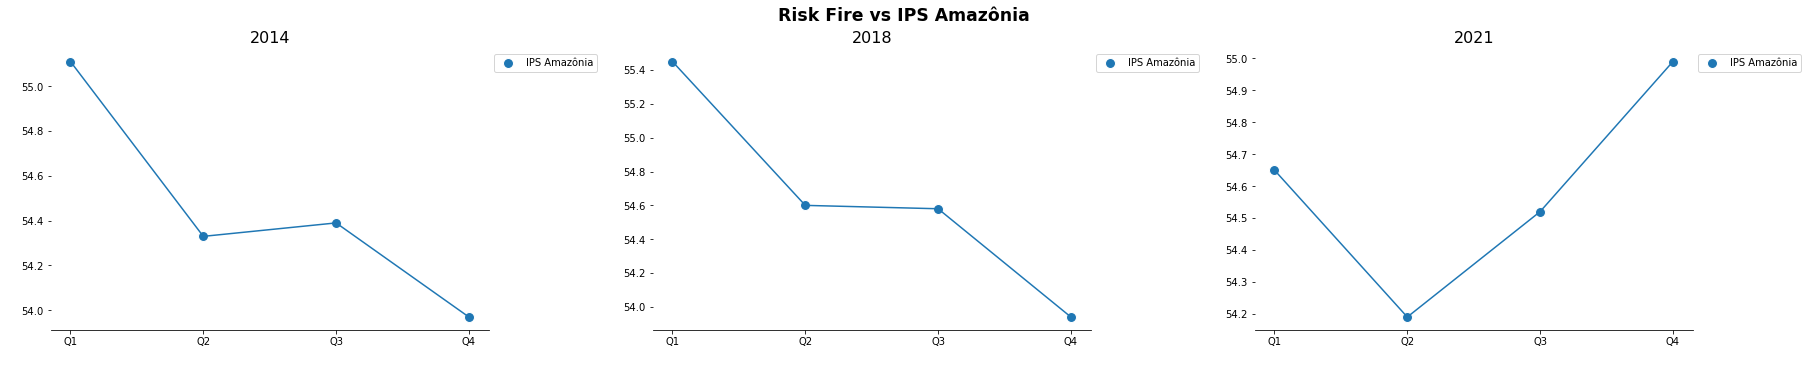

In [9]:
features_names = ["indriscocat", "IPS Amazônia"]
plot_label_x_features(features_names, "Risk Fire vs IPS Amazônia")

### Plot Risk Fire vs Dimensions

__Risk Fire vs SPI Dimensions__

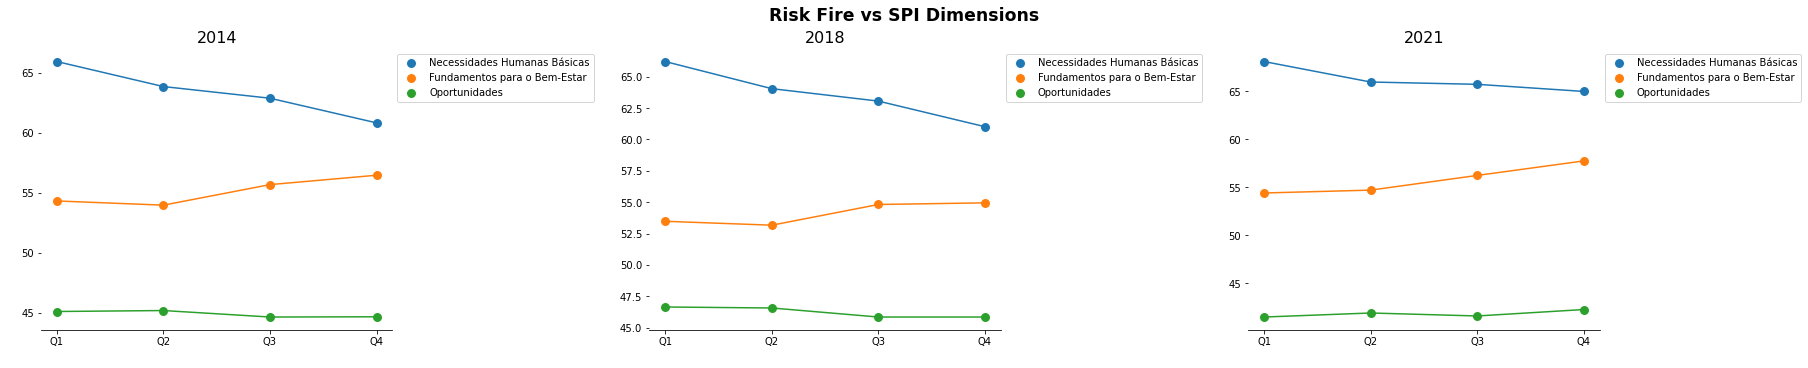

In [10]:
features_names = ["indriscocat", "Necessidades Humanas Básicas", "Fundamentos para o Bem-Estar", "Oportunidades"]
plot_label_x_features(features_names, "Risk Fire vs SPI Dimensions")

### Plot Risk Fire vs Components

__Risk Fire vs "Necessidades Humanas Básicas" SPI Component__

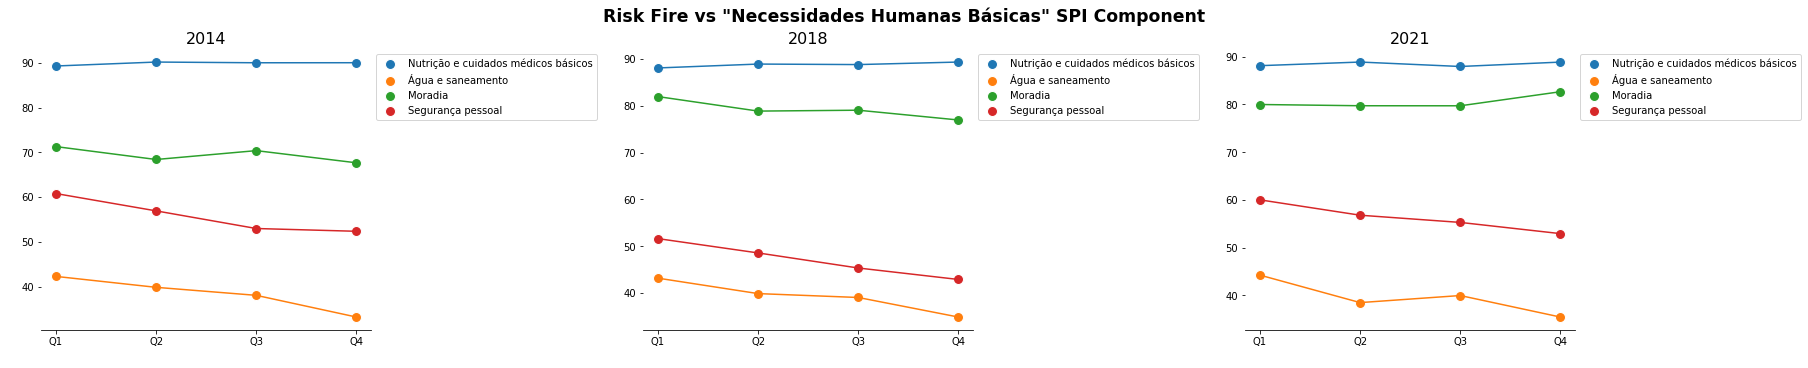

In [11]:
features_names = ["indriscocat", "Nutrição e cuidados médicos básicos", "Água e saneamento","Moradia","Segurança pessoal"]
plot_label_x_features(features_names, "Risk Fire vs \"Necessidades Humanas Básicas\" SPI Component")

__Risk Fire vs "Fundamentos para o Bem-Estar" SPI Component__

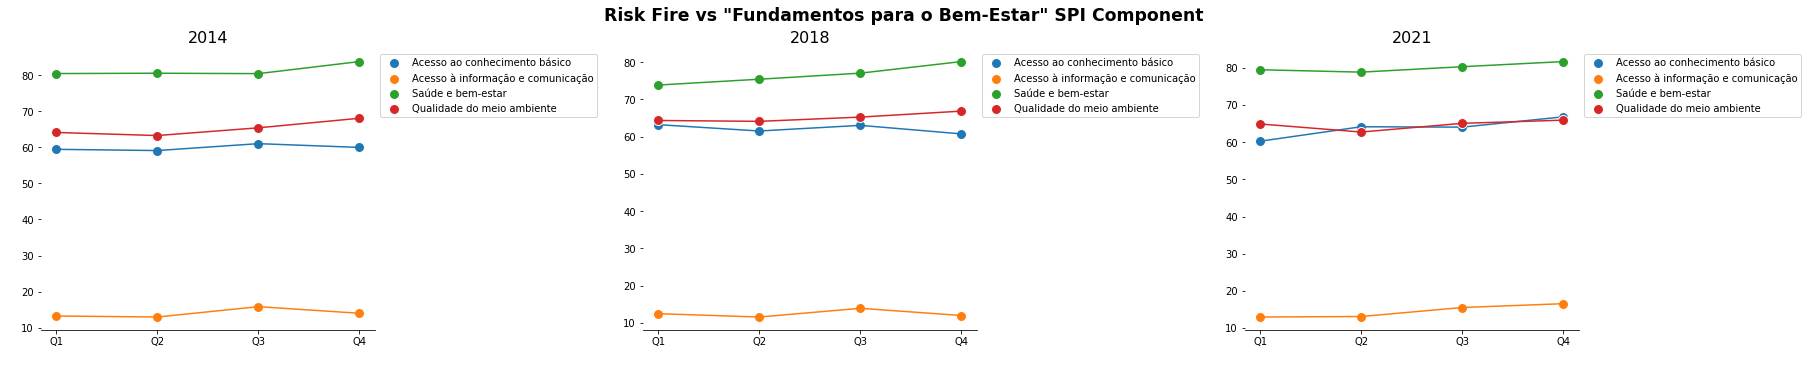

In [12]:
features_names = ["indriscocat", "Acesso ao conhecimento básico", "Acesso à informação e comunicação", "Saúde e bem-estar", "Qualidade do meio ambiente"]
plot_label_x_features(features_names, "Risk Fire vs \"Fundamentos para o Bem-Estar\" SPI Component")

__Risk Fire vs "Oportunidades" SPI Component__

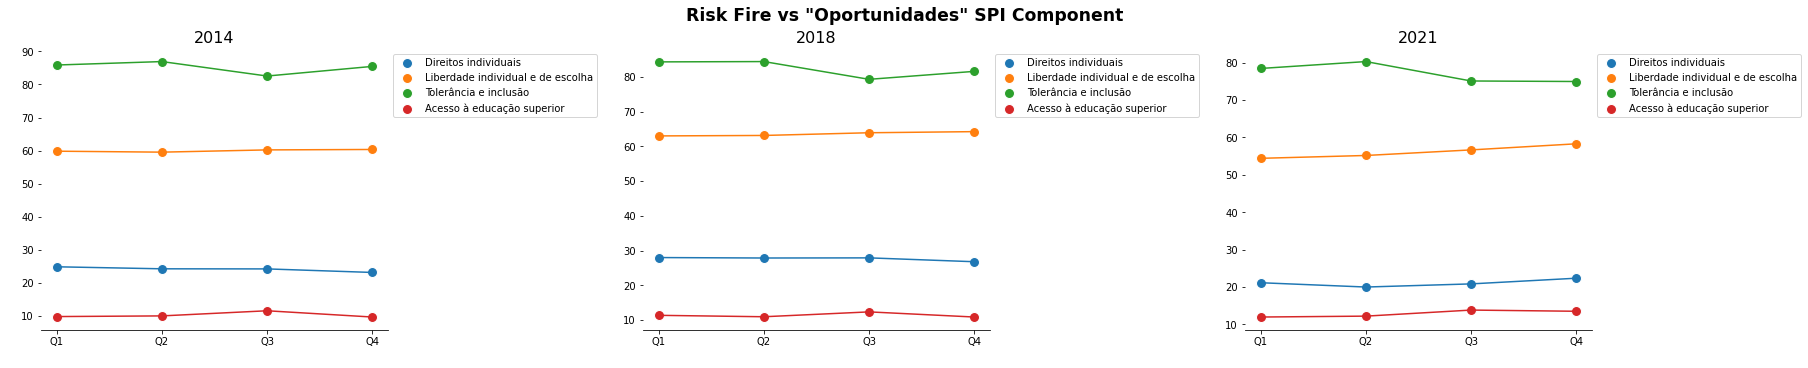

In [13]:
features_names = ["indriscocat", "Direitos individuais", "Liberdade individual e de escolha", "Tolerância e inclusão", "Acesso à educação superior"]
plot_label_x_features(features_names, "Risk Fire vs \"Oportunidades\" SPI Component")

### Plot Risk Fire vs Indicators

```
  _   _                        _     _           _             _   _                                         ____    __      _               
 | \ | | ___  ___ ___  ___ ___(_) __| | __ _  __| | ___  ___  | | | |_   _ _ __ ___   __ _ _ __   __ _ ___  | __ )  /_/_ ___(_) ___ __ _ ___ 
 |  \| |/ _ \/ __/ _ \/ __/ __| |/ _` |/ _` |/ _` |/ _ \/ __| | |_| | | | | '_ ` _ \ / _` | '_ \ / _` / __| |  _ \ / _` / __| |/ __/ _` / __|
 | |\  |  __/ (_|  __/\__ \__ \ | (_| | (_| | (_| |  __/\__ \ |  _  | |_| | | | | | | (_| | | | | (_| \__ \ | |_) | (_| \__ \ | (_| (_| \__ \
 |_| \_|\___|\___\___||___/___/_|\__,_|\__,_|\__,_|\___||___/ |_| |_|\__,_|_| |_| |_|\__,_|_| |_|\__,_|___/ |____/ \__,_|___/_|\___\__,_|___/
 ```

#### Risk Fire vs "Nutrição e cuidados médicos básicos" SPI Indicator

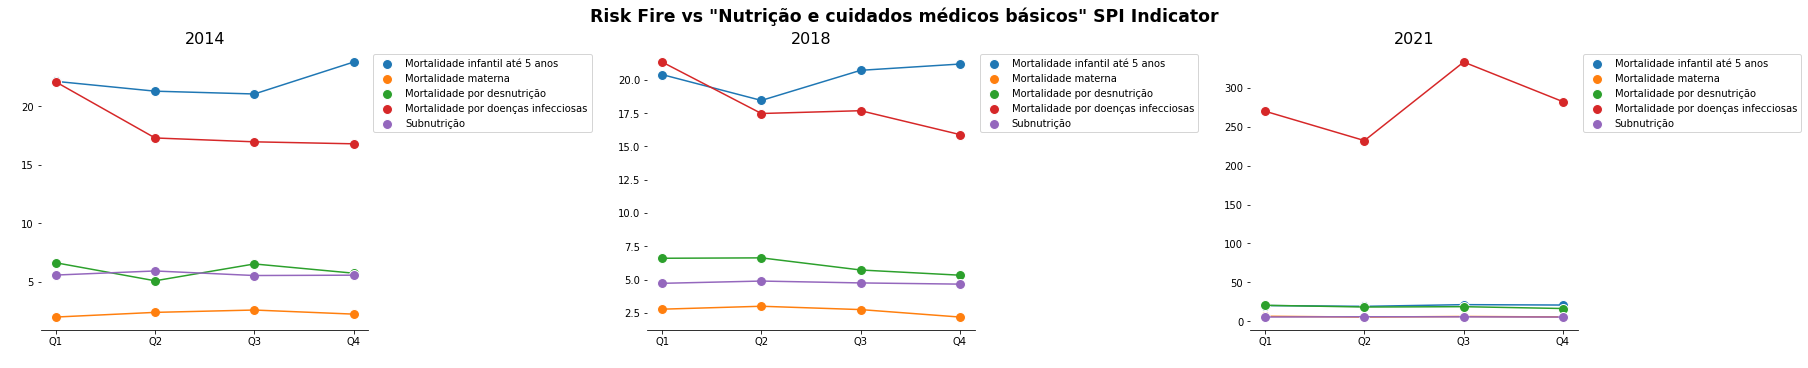

In [14]:
features_names = ["indriscocat", "Mortalidade infantil até 5 anos", "Mortalidade materna", "Mortalidade por desnutrição", "Mortalidade por doenças infecciosas", "Subnutrição"]
plot_label_x_features(features_names, "Risk Fire vs \"Nutrição e cuidados médicos básicos\" SPI Indicator")

__Dot Plot "Mortalidade infantil até 5 anos" Indicator__

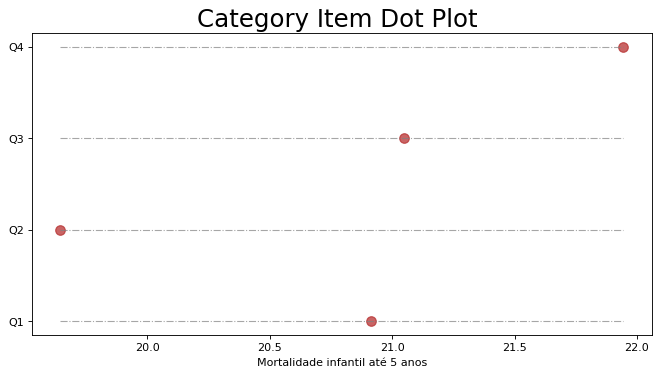

In [15]:
cat = "indriscocat"
inidicator = "Mortalidade infantil até 5 anos"
plot_dot_cat_item(dataset, cat, inidicator)

In [16]:
indicators = ["Mortalidade infantil até 5 anos"]
get_inds_groupedby_year_and_cat(indicators)

Mortalidade infantil até 5 anos                  
indriscocat                              Q1    Q2    Q3    Q4
ano                                                          
2014                                   22.1  21.3  21.0  23.8
2018                                   20.4  18.5  20.7  21.2
2021                                   20.2  19.2  21.4  20.9

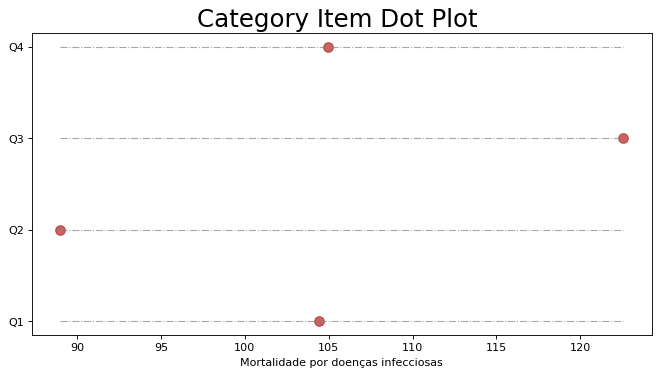

In [17]:
cat = "indriscocat"
inidicator = "Mortalidade por doenças infecciosas"
plot_dot_cat_item(dataset, cat, inidicator)

In [18]:
indicators = ["Mortalidade por doenças infecciosas"]
get_inds_groupedby_year_and_cat(indicators)

Mortalidade por doenças infecciosas                     
indriscocat                                  Q1     Q2     Q3     Q4
ano                                                                 
2014                                       22.1   17.3   16.9   16.8
2018                                       21.3   17.5   17.7   15.9
2021                                      269.9  232.2  333.1  282.2

<Figure size 2400x640 with 0 Axes>

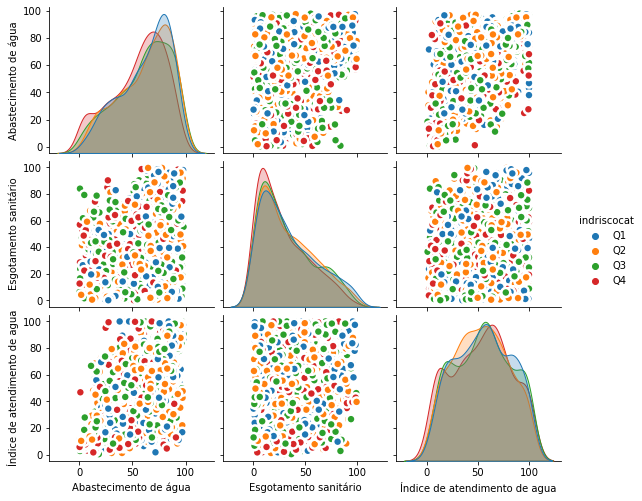

In [87]:
hue_order = ["Q1", "Q2", "Q3", "Q4"]
df = dataset[["indriscocat", "Abastecimento de água", "Esgotamento sanitário", "Índice de atendimento de agua"]]
plot_pairwise(df, hue="indriscocat", hue_order=hue_order)

__Risk Fire vs "Água e saneamento" SPI Indicator__

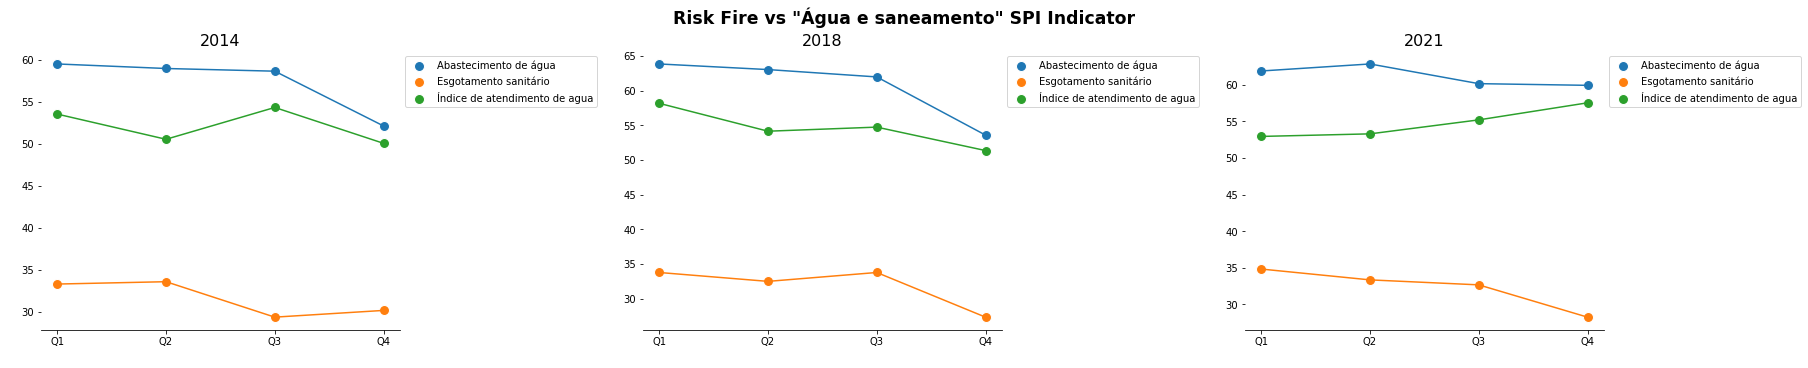

In [19]:
features_names = ["indriscocat", "Abastecimento de água", "Esgotamento sanitário", "Índice de atendimento de agua"]
plot_label_x_features(features_names, "Risk Fire vs \"Água e saneamento\" SPI Indicator")

__Risk Fire vs "Moradia" SPI Indicator__

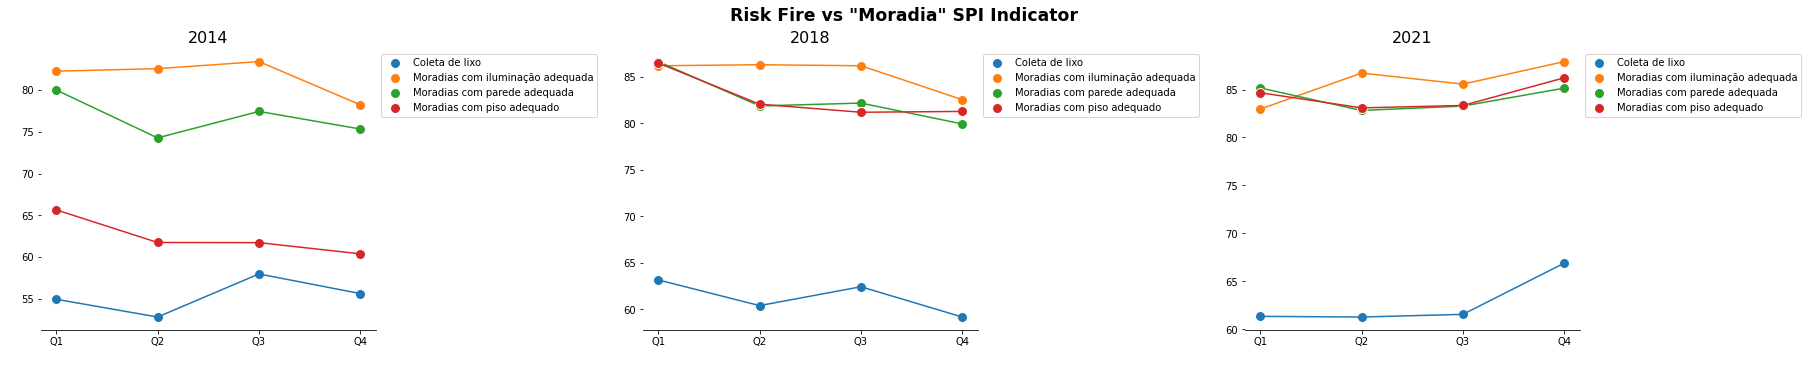

In [20]:
features_names = ["indriscocat", "Coleta de lixo", "Moradias com iluminação adequada", "Moradias com parede adequada", "Moradias com piso adequado"]
plot_label_x_features(features_names, "Risk Fire vs \"Moradia\" SPI Indicator")

#### Risk Fire vs "Segurança pessoal" SPI Indicator

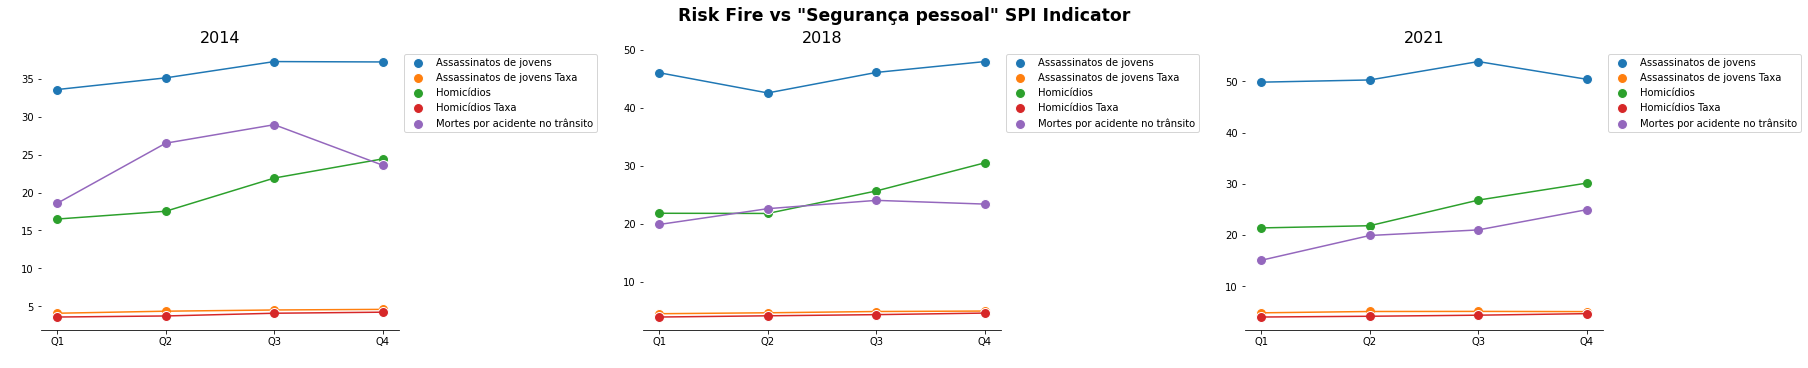

In [21]:
features_names = ["indriscocat", "Assassinatos de jovens", "Assassinatos de jovens Taxa", "Homicídios", "Homicídios Taxa", "Mortes por acidente no trânsito"]
plot_label_x_features(features_names, "Risk Fire vs \"Segurança pessoal\" SPI Indicator")

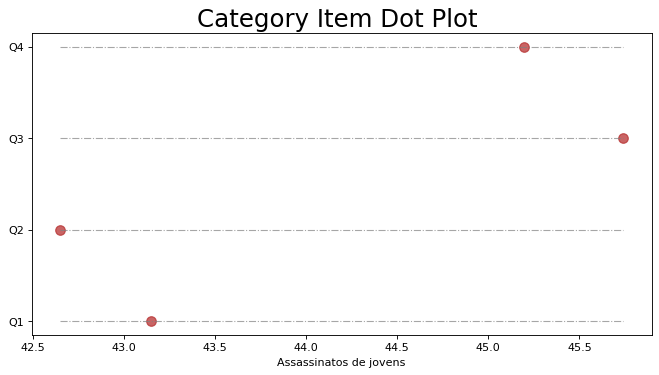

In [22]:
cat = "indriscocat"
inidicator = "Assassinatos de jovens"
plot_dot_cat_item(dataset, cat, inidicator)

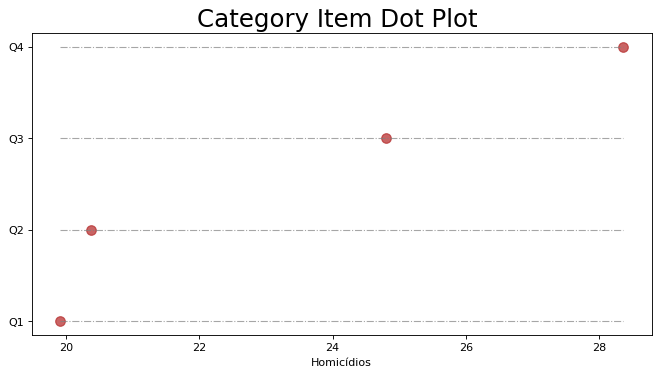

In [23]:
cat = "indriscocat"
inidicator = "Homicídios"
plot_dot_cat_item(dataset, cat, inidicator)

<Figure size 2400x640 with 0 Axes>

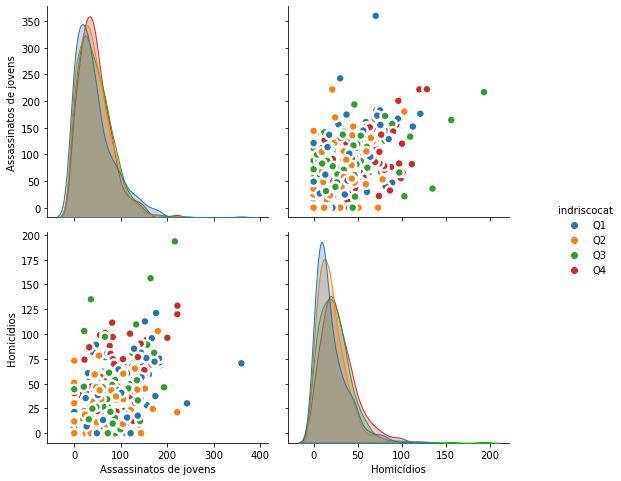

In [ ]:
hue_order = ["Q1", "Q2", "Q3", "Q4"]
df = dataset[["indriscocat",  "Assassinatos de jovens", "Homicídios"]]
plot_pairwise(df, hue="indriscocat", hue_order=hue_order)

In [25]:
indicators = ["Assassinatos de jovens", "Homicídios"]
get_inds_groupedby_year_and_cat(indicators)

Assassinatos de jovens                   Homicídios              \
indriscocat                     Q1    Q2    Q3    Q4         Q1    Q2    Q3   
ano                                                                           
2014                          33.6  35.1  37.3  37.2       16.5  17.5  21.9   
2018                          46.0  42.5  46.1  47.9       21.8  21.8  25.7   
2021                          49.9  50.3  53.9  50.4       21.4  21.8  26.8   

                   
indriscocat    Q4  
ano                
2014         24.4  
2018         30.5  
2021         30.1

```
  _____                _                            _                                              ____                                 _             
 |  ___|   _ _ __   __| | __ _ _ __ ___   ___ _ __ | |_ ___  ___   _ __   __ _ _ __ __ _    ___   | __ )  ___ _ __ ___         ___  ___| |_ __ _ _ __ 
 | |_ | | | | '_ \ / _` |/ _` | '_ ` _ \ / _ \ '_ \| __/ _ \/ __| | '_ \ / _` | '__/ _` |  / _ \  |  _ \ / _ \ '_ ` _ \ _____ / _ \/ __| __/ _` | '__|
 |  _|| |_| | | | | (_| | (_| | | | | | |  __/ | | | || (_) \__ \ | |_) | (_| | | | (_| | | (_) | | |_) |  __/ | | | | |_____|  __/\__ \ || (_| | |   
 |_|   \__,_|_| |_|\__,_|\__,_|_| |_| |_|\___|_| |_|\__\___/|___/ | .__/ \__,_|_|  \__,_|  \___/  |____/ \___|_| |_| |_|      \___||___/\__\__,_|_|   
                                                                  |_|                                                                                 

```

__Risk Fire vs "Acesso ao conhecimento básico" SPI Indicator__

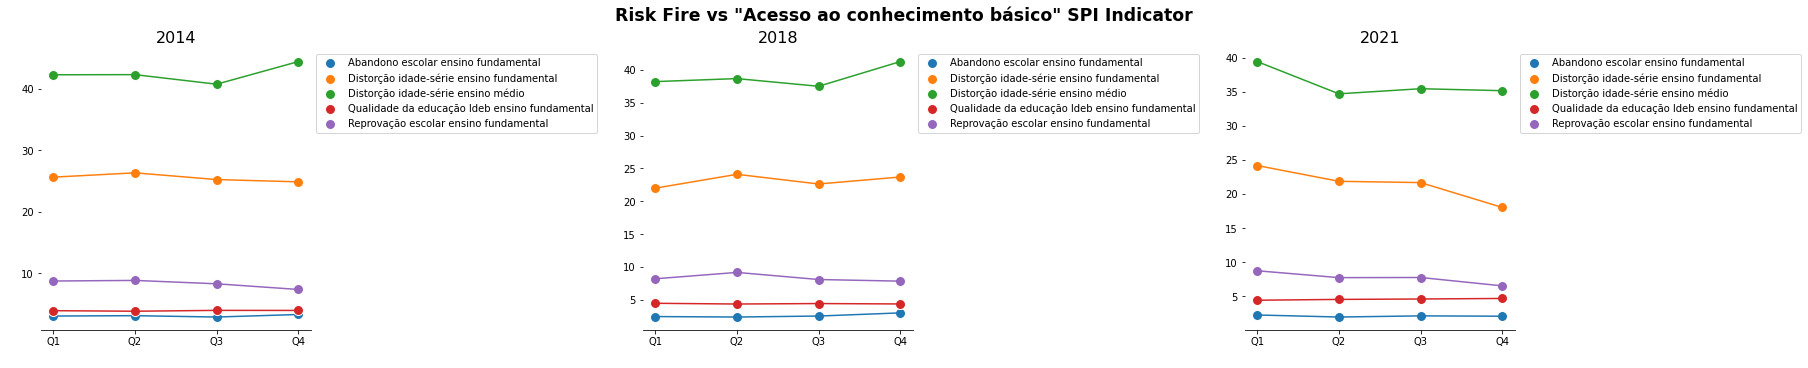

In [26]:
features_names = ["indriscocat", "Abandono escolar ensino fundamental", "Distorção idade-série ensino fundamental", "Distorção idade-série ensino médio", "Qualidade da educação Ideb ensino fundamental", "Reprovação escolar ensino fundamental"]
plot_label_x_features(features_names, "Risk Fire vs \"Acesso ao conhecimento básico\" SPI Indicator")

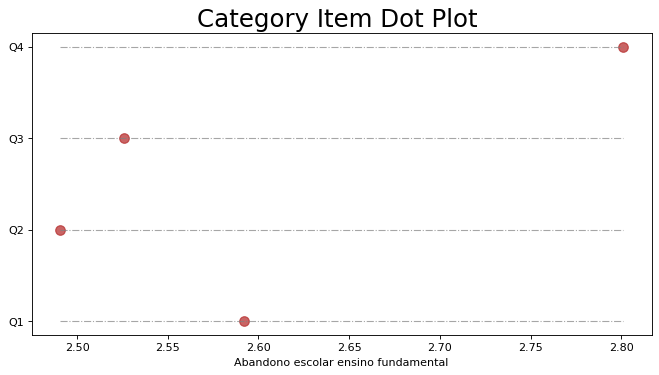

In [27]:
cat = "indriscocat"
inidicator = "Abandono escolar ensino fundamental"
plot_dot_cat_item(dataset, cat, inidicator)

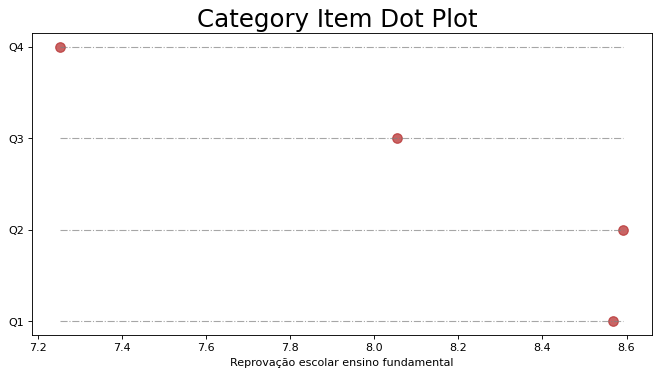

In [28]:
cat = "indriscocat"
inidicator = "Reprovação escolar ensino fundamental"
plot_dot_cat_item(dataset, cat, inidicator)

In [71]:
indicators = ["Abandono escolar ensino fundamental", "Reprovação escolar ensino fundamental"]
get_inds_groupedby_year_and_cat(indicators)

Abandono escolar ensino fundamental                 \
indriscocat                                  Q1   Q2   Q3   Q4   
ano                                                              
2014                                        3.1  3.1  2.9  3.3   
2018                                        2.5  2.4  2.5  3.0   
2021                                        2.2  1.9  2.1  2.1   

            Reprovação escolar ensino fundamental                 
indriscocat                                    Q1   Q2   Q3   Q4  
ano                                                               
2014                                          8.8  8.9  8.3  7.4  
2018                                          8.2  9.2  8.1  7.8  
2021                                          8.7  7.7  7.7  6.5

__Risk Fire vs "Acesso à informação e comunicação" SPI Indicator__

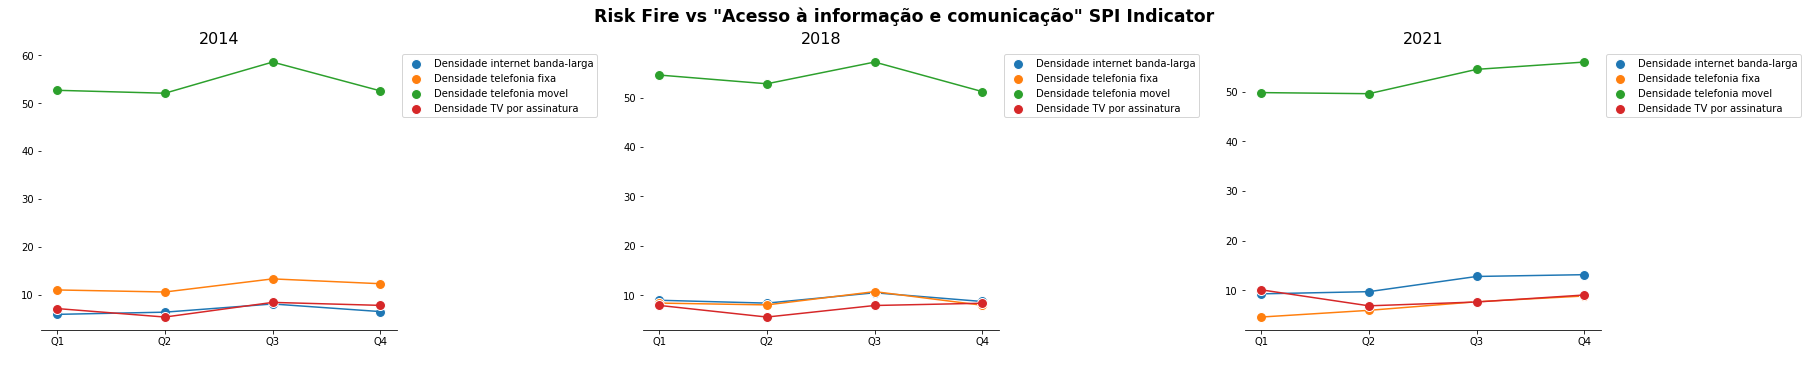

In [34]:
features_names = ["indriscocat", "Densidade internet banda-larga", "Densidade telefonia fixa", "Densidade telefonia movel", "Densidade TV por assinatura"]
plot_label_x_features(features_names, "Risk Fire vs \"Acesso à informação e comunicação\" SPI Indicator")

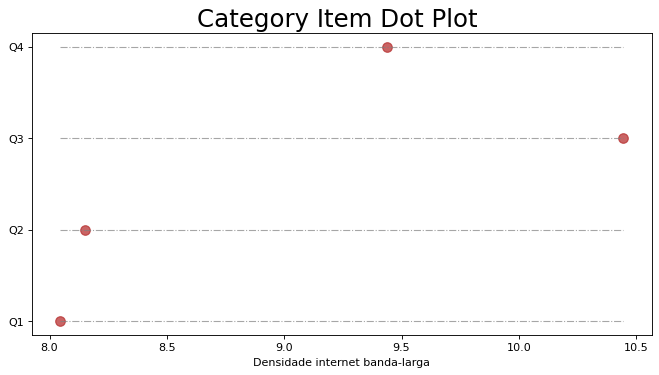

In [117]:
cat = "indriscocat"
inidicator = "Densidade internet banda-larga"
plot_dot_cat_item(dataset, cat, inidicator)

In [118]:
indicators = ["Densidade internet banda-larga"]
get_inds_groupedby_year_and_cat(indicators)

Densidade internet banda-larga                 
indriscocat                             Q1   Q2    Q3    Q4
ano                                                        
2014                                   5.9  6.4   8.1   6.5
2018                                   9.0  8.4  10.5   8.7
2021                                   9.3  9.7  12.8  13.1

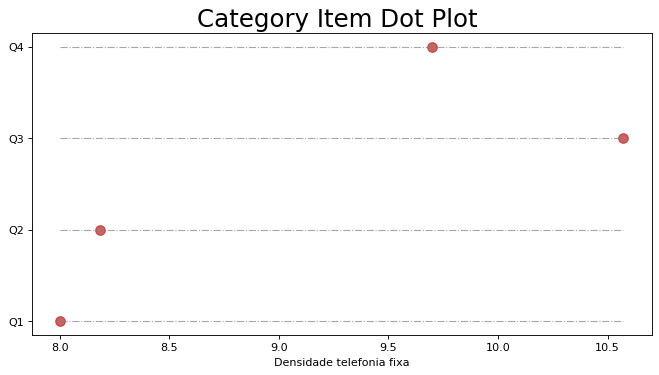

In [119]:
cat = "indriscocat"
inidicator = "Densidade telefonia fixa"
plot_dot_cat_item(dataset, cat, inidicator)

In [120]:
indicators = ["Densidade telefonia fixa"]
get_inds_groupedby_year_and_cat(indicators)

Densidade telefonia fixa                  
indriscocat                       Q1    Q2    Q3    Q4
ano                                                   
2014                            11.0  10.6  13.3  12.3
2018                             8.4   8.0  10.7   8.0
2021                             4.6   6.0   7.7   8.8

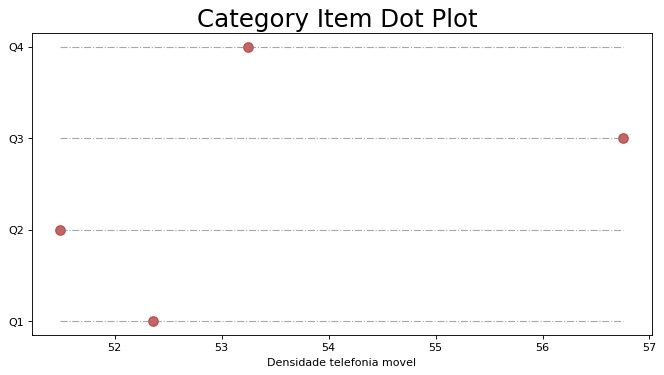

In [121]:
cat = "indriscocat"
inidicator = "Densidade telefonia movel"
plot_dot_cat_item(dataset, cat, inidicator)

In [123]:
indicators = ["Densidade telefonia movel"]
get_inds_groupedby_year_and_cat(indicators)

Densidade telefonia movel                  
indriscocat                        Q1    Q2    Q3    Q4
ano                                                    
2014                             52.7  52.1  58.6  52.6
2018                             54.6  52.8  57.2  51.2
2021                             49.8  49.6  54.5  55.9

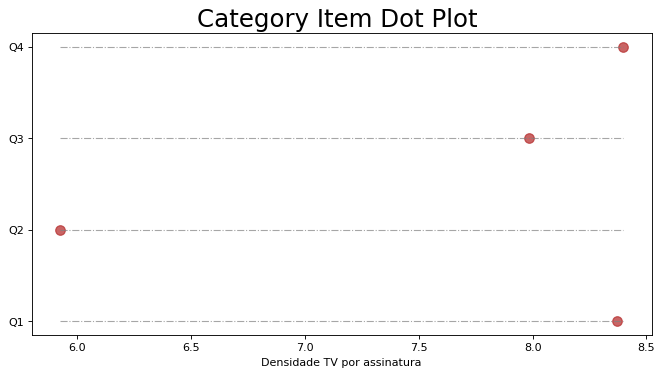

In [122]:
cat = "indriscocat"
inidicator = "Densidade TV por assinatura"
plot_dot_cat_item(dataset, cat, inidicator)

In [36]:
indicators = ["Densidade TV por assinatura"]
get_inds_groupedby_year_and_cat(indicators)

Densidade TV por assinatura               
indriscocat                          Q1   Q2   Q3   Q4
ano                                                   
2014                                7.1  5.3  8.4  7.8
2018                                7.9  5.6  7.9  8.4
2021                               10.1  6.9  7.6  9.1

__Risk Fire vs "Saúde e bem-estar" SPI Indicator__

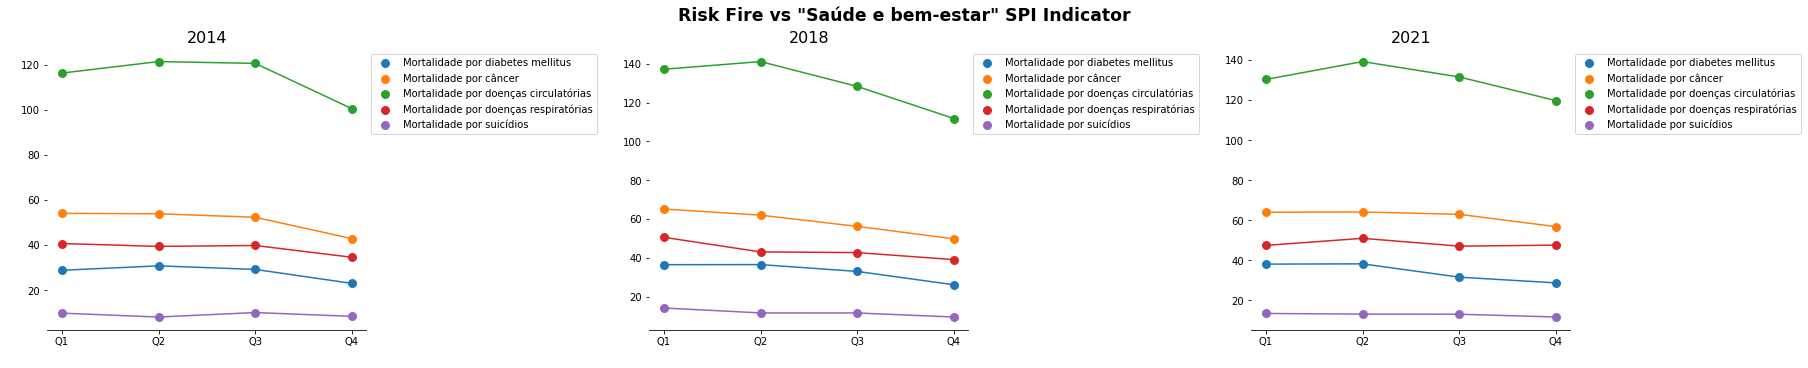

In [37]:
features_names = ["indriscocat", "Mortalidade por diabetes mellitus", "Mortalidade por câncer", "Mortalidade por doenças circulatórias", "Mortalidade por doenças respiratórias", "Mortalidade por suicídios"]
plot_label_x_features(features_names, "Risk Fire vs \"Saúde e bem-estar\" SPI Indicator")

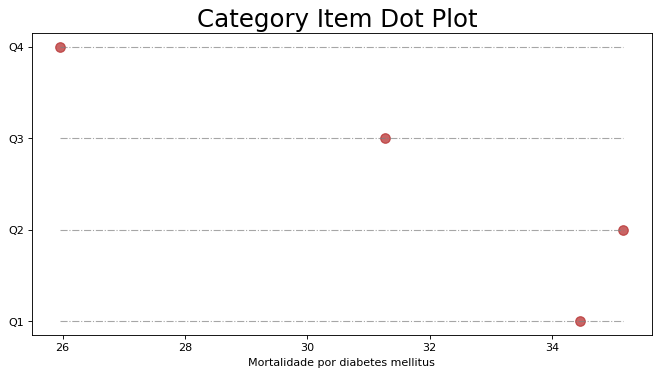

In [88]:
cat = "indriscocat"
inidicator = "Mortalidade por diabetes mellitus"
plot_dot_cat_item(dataset, cat, inidicator)

In [ ]:
cat = "indriscocat"
inidicator = "Mortalidade por diabetes mellitus"
plot_dot_cat_item(dataset, cat, inidicator)

In [95]:
indicators = ["Mortalidade por diabetes mellitus"]
get_inds_groupedby_year_and_cat(indicators)

Mortalidade por diabetes mellitus                  
indriscocat                                Q1    Q2    Q3    Q4
ano                                                            
2014                                     28.8  30.7  29.2  23.0
2018                                     36.5  36.5  33.0  26.1
2021                                     38.1  38.3  31.6  28.8

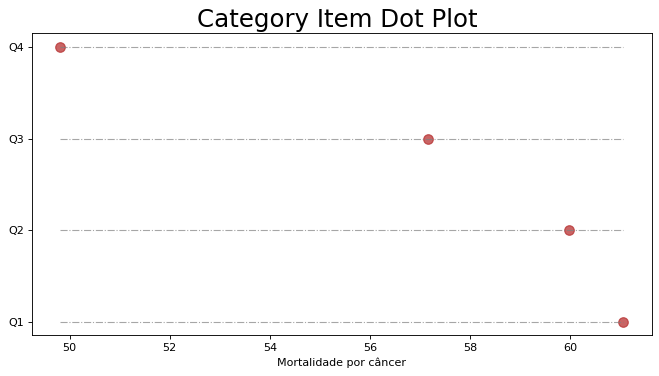

In [89]:
cat = "indriscocat"
inidicator = "Mortalidade por câncer"
plot_dot_cat_item(dataset, cat, inidicator)

In [92]:
indicators = ["Mortalidade por câncer"]
get_inds_groupedby_year_and_cat(indicators)

Mortalidade por câncer                  
indriscocat                     Q1    Q2    Q3    Q4
ano                                                 
2014                          54.0  53.8  52.3  42.8
2018                          65.1  62.0  56.2  49.8
2021                          64.0  64.1  63.0  56.8

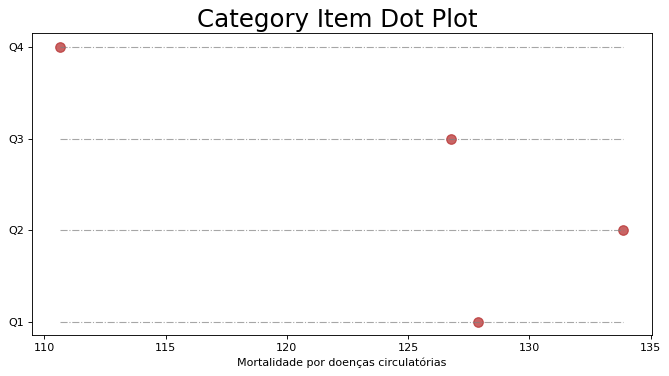

In [90]:
cat = "indriscocat"
inidicator = "Mortalidade por doenças circulatórias"
plot_dot_cat_item(dataset, cat, inidicator)

In [93]:
indicators = ["Mortalidade por doenças circulatórias"]
get_inds_groupedby_year_and_cat(indicators)

Mortalidade por doenças circulatórias                     
indriscocat                                    Q1     Q2     Q3     Q4
ano                                                                   
2014                                        116.2  121.3  120.5  100.4
2018                                        137.1  141.1  128.3  111.8
2021                                        130.3  139.2  131.5  119.7

In [39]:
indicators = ["Mortalidade por doenças respiratórias"]
get_inds_groupedby_year_and_cat(indicators)

Mortalidade por doenças respiratórias                  
indriscocat                                    Q1    Q2    Q3    Q4
ano                                                                
2014                                         40.7  39.4  39.8  34.6
2018                                         50.6  43.1  42.7  39.1
2021                                         47.5  51.0  47.1  47.6

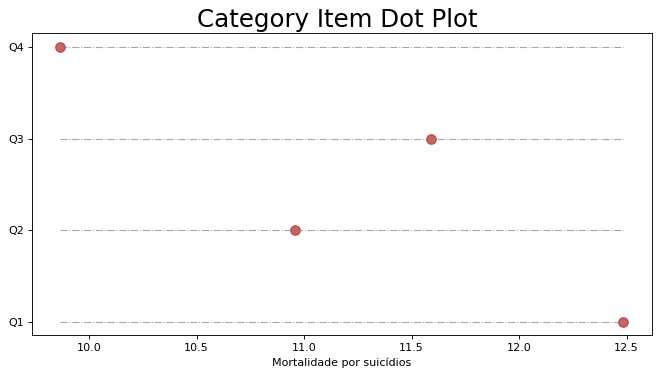

In [91]:
cat = "indriscocat"
inidicator = "Mortalidade por suicídios"
plot_dot_cat_item(dataset, cat, inidicator)

In [94]:
indicators = ["Mortalidade por suicídios"]
get_inds_groupedby_year_and_cat(indicators)

Mortalidade por suicídios                  
indriscocat                        Q1    Q2    Q3    Q4
ano                                                    
2014                              9.8   8.1  10.1   8.4
2018                             14.2  11.6  11.6   9.5
2021                             13.5  13.2  13.1  11.7

__Risk Fire vs "Qualidade do meio ambiente" SPI Indicator__

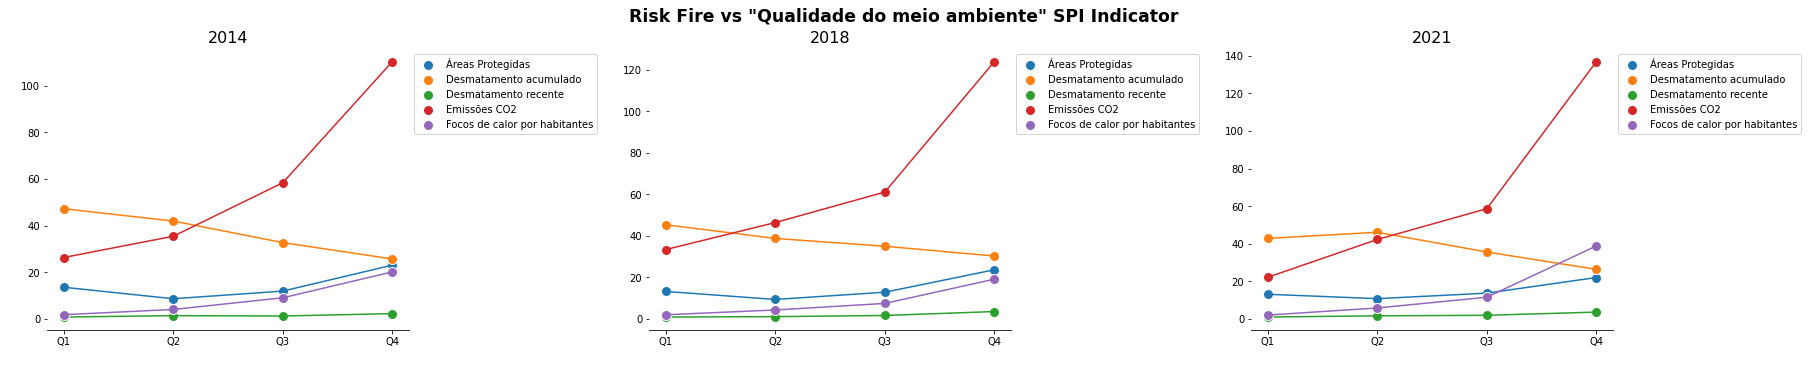

In [40]:
features_names = ["indriscocat", "Áreas Protegidas", "Desmatamento acumulado", "Desmatamento recente", "Emissões CO2", "Focos de calor por habitantes"]
plot_label_x_features(features_names, "Risk Fire vs \"Qualidade do meio ambiente\" SPI Indicator")

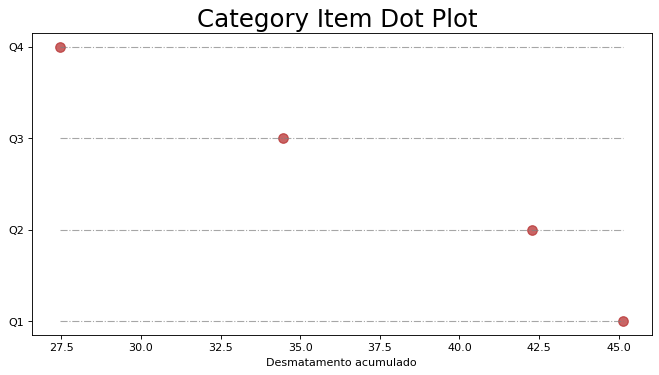

In [41]:
cat = "indriscocat"
inidicator = "Desmatamento acumulado"
plot_dot_cat_item(dataset, cat, inidicator)

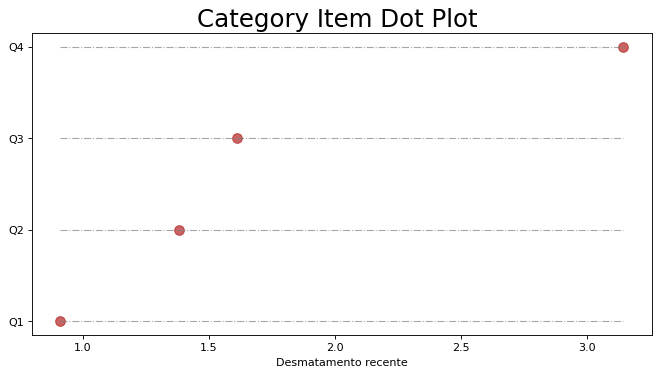

In [42]:
cat = "indriscocat"
inidicator = "Desmatamento recente"
plot_dot_cat_item(dataset, cat, inidicator)

In [43]:
indicators = ["Desmatamento acumulado", "Desmatamento recente"]
get_inds_groupedby_year_and_cat(indicators)

Desmatamento acumulado                   Desmatamento recente  \
indriscocat                     Q1    Q2    Q3    Q4                   Q1   
ano                                                                         
2014                          47.3  42.0  32.7  25.7                  0.9   
2018                          45.3  38.7  35.0  30.2                  0.8   
2021                          42.9  46.1  35.6  26.4                  1.0   

                            
indriscocat   Q2   Q3   Q4  
ano                         
2014         1.5  1.3  2.3  
2018         1.0  1.6  3.5  
2021         1.7  1.9  3.6

<Figure size 2400x640 with 0 Axes>

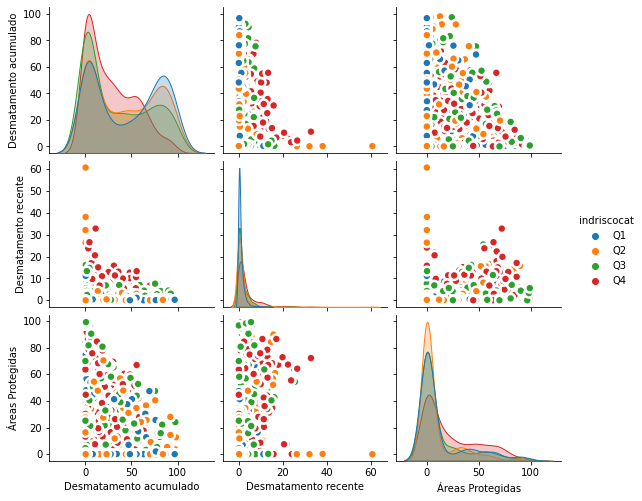

In [44]:
hue_order = ["Q1", "Q2", "Q3", "Q4"]
df = dataset[["indriscocat",  "Desmatamento acumulado", "Desmatamento recente", "Áreas Protegidas"]]
plot_pairwise(df, hue="indriscocat", hue_order=hue_order)

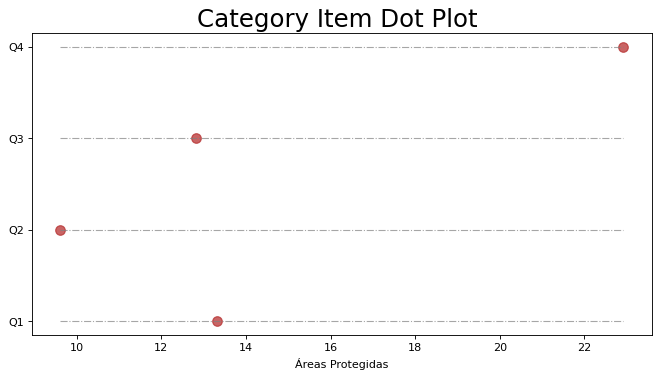

In [45]:
cat = "indriscocat"
inidicator = "Áreas Protegidas"
plot_dot_cat_item(dataset, cat, inidicator)

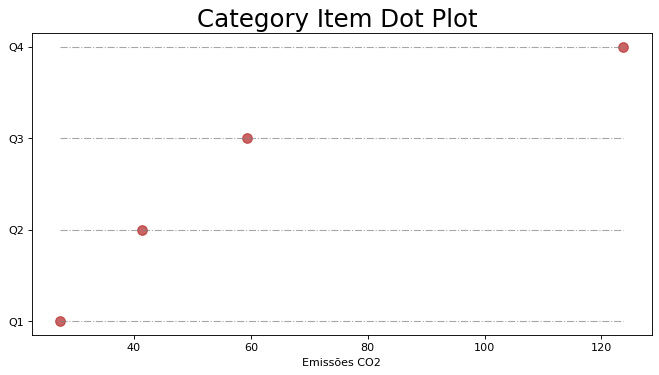

In [46]:
cat = "indriscocat"
inidicator = "Emissões CO2"
plot_dot_cat_item(dataset, cat, inidicator)

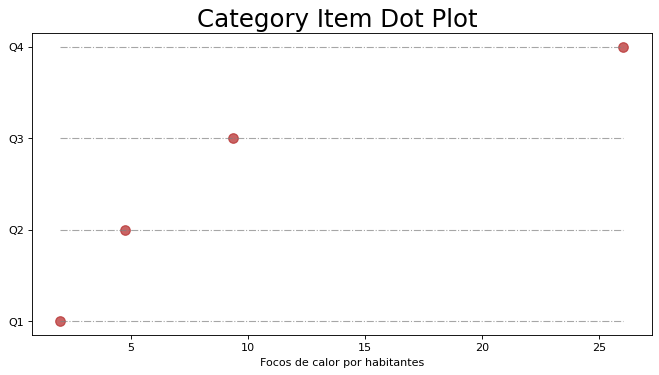

In [47]:
cat = "indriscocat"
inidicator = "Focos de calor por habitantes"
plot_dot_cat_item(dataset, cat, inidicator)

In [78]:
indicators = ["Emissões CO2", "Focos de calor por habitantes", "Áreas Protegidas"]
get_inds_groupedby_year_and_cat(indicators)

Emissões CO2                    Focos de calor por habitantes  \
indriscocat           Q1    Q2    Q3     Q4                            Q1   
ano                                                                         
2014                26.4  35.5  58.4  110.3                           1.9   
2018                33.4  46.4  61.1  124.0                           1.9   
2021                22.2  42.3  58.7  137.0                           2.1   

                             Áreas Protegidas                    
indriscocat   Q2    Q3    Q4               Q1    Q2    Q3    Q4  
ano                                                              
2014         4.1   9.1  20.2             13.6   8.7  12.0  23.1  
2018         4.2   7.4  19.1             13.2   9.3  12.8  23.6  
2021         5.8  11.6  38.9             13.1  10.8  13.7  22.1

```
   ___                   _               _     _           _           
  / _ \ _ __   ___  _ __| |_ _   _ _ __ (_) __| | __ _  __| | ___  ___ 
 | | | | '_ \ / _ \| '__| __| | | | '_ \| |/ _` |/ _` |/ _` |/ _ \/ __|
 | |_| | |_) | (_) | |  | |_| |_| | | | | | (_| | (_| | (_| |  __/\__ \
  \___/| .__/ \___/|_|   \__|\__,_|_| |_|_|\__,_|\__,_|\__,_|\___||___/
       |_|                                                             
```

__Risk Fire vs "Direitos individuais" SPI Indicator__

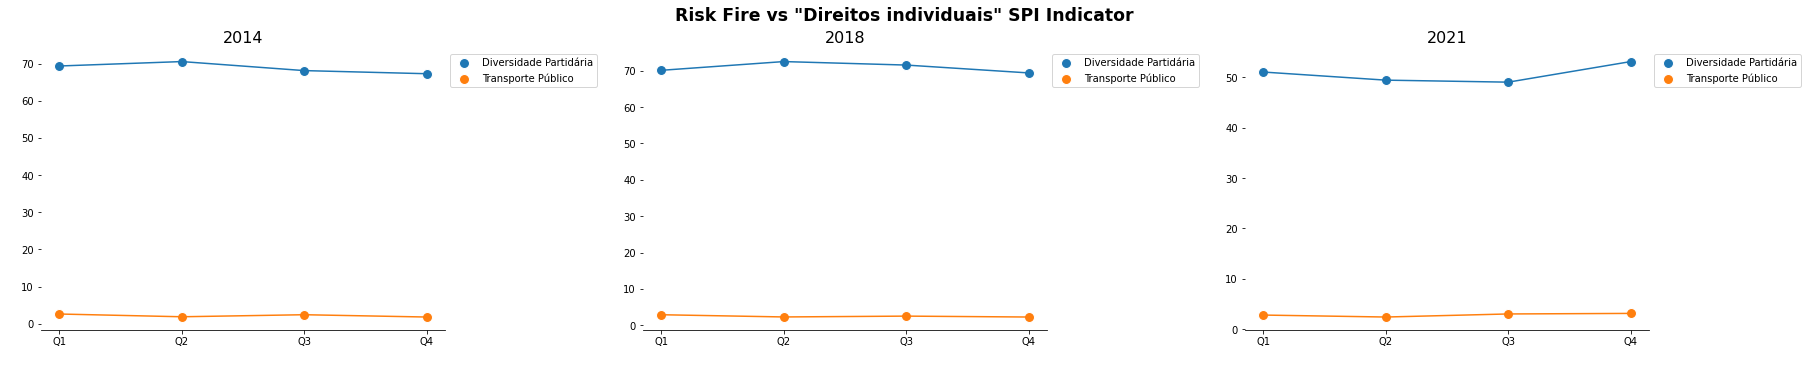

In [49]:
features_names = ["indriscocat", "Diversidade Partidária", "Transporte Público"]
plot_label_x_features(features_names, "Risk Fire vs \"Direitos individuais\" SPI Indicator")

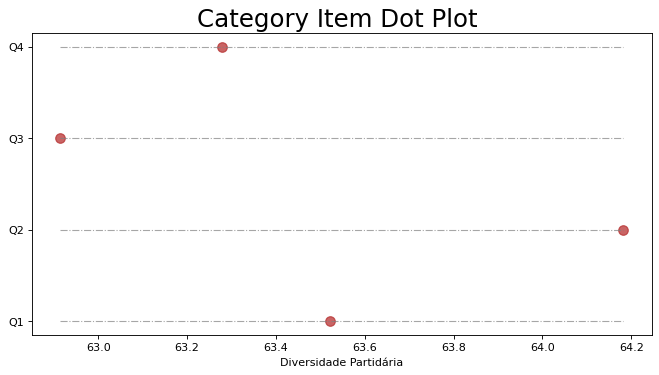

In [112]:
cat = "indriscocat"
inidicator = "Diversidade Partidária"
plot_dot_cat_item(dataset, cat, inidicator)

In [113]:
indicators = ["Diversidade Partidária"]
get_inds_groupedby_year_and_cat(indicators)

Diversidade Partidária                  
indriscocat                     Q1    Q2    Q3    Q4
ano                                                 
2014                          69.4  70.6  68.1  67.3
2018                          70.1  72.5  71.5  69.4
2021                          51.1  49.5  49.1  53.2

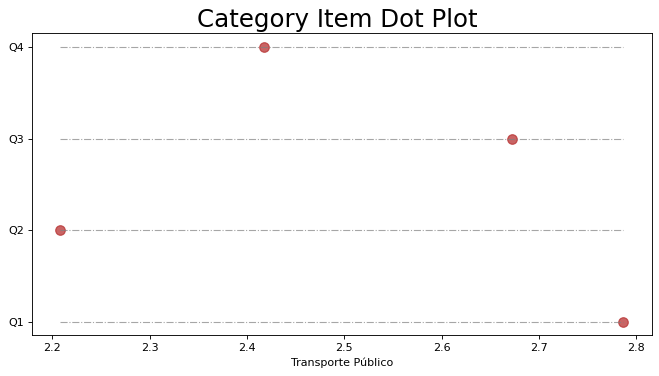

In [115]:
cat = "indriscocat"
inidicator = "Transporte Público"
plot_dot_cat_item(dataset, cat, inidicator)

In [116]:
indicators = ["Transporte Público"]
get_inds_groupedby_year_and_cat(indicators)

Transporte Público               
indriscocat                 Q1   Q2   Q3   Q4
ano                                          
2014                       2.6  1.9  2.4  1.8
2018                       2.9  2.3  2.6  2.3
2021                       2.8  2.4  3.0  3.1

__Risk Fire vs "Liberdades individuais" SPI Indicator__

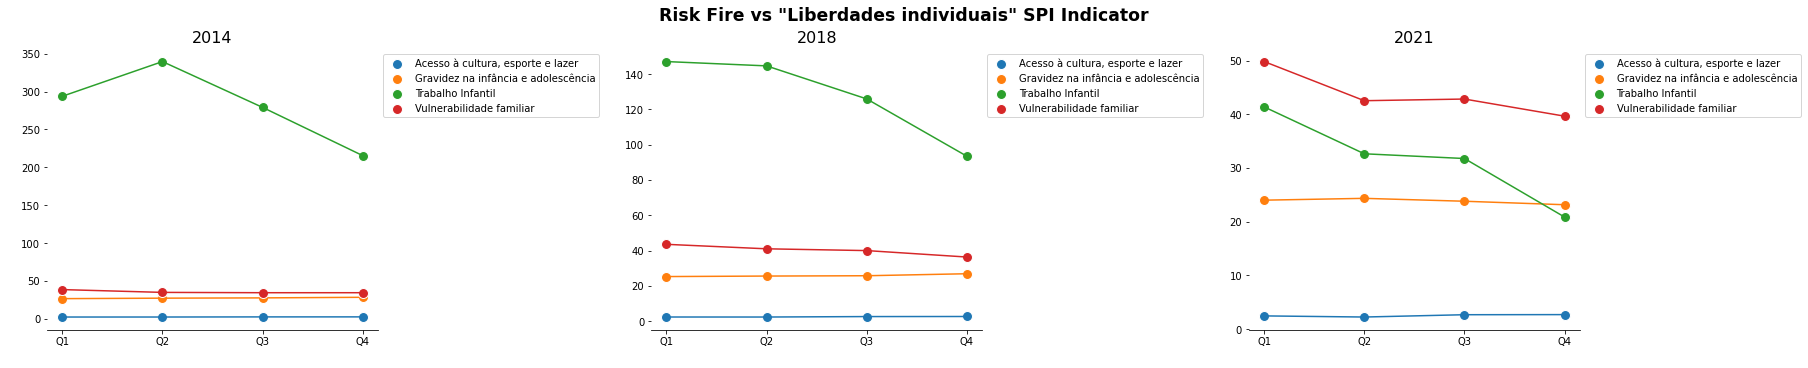

In [50]:
features_names = ["indriscocat", "Acesso à cultura, esporte e lazer", "Gravidez na infância e adolescência", "Trabalho Infantil" , "Vulnerabilidade familiar"]
plot_label_x_features(features_names, "Risk Fire vs \"Liberdades individuais\" SPI Indicator")

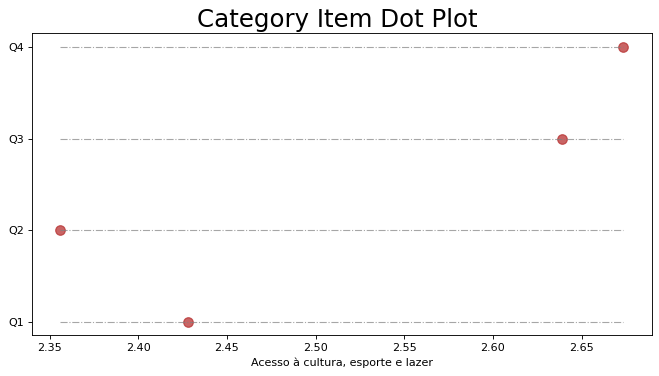

In [105]:
cat = "indriscocat"
inidicator = "Acesso à cultura, esporte e lazer"
plot_dot_cat_item(dataset, cat, inidicator)

In [106]:
indicators = ["Acesso à cultura, esporte e lazer"]
get_inds_groupedby_year_and_cat(indicators)

Acesso à cultura, esporte e lazer               
indriscocat                                Q1   Q2   Q3   Q4
ano                                                         
2014                                      2.4  2.4  2.6  2.6
2018                                      2.4  2.4  2.6  2.7
2021                                      2.5  2.2  2.7  2.7

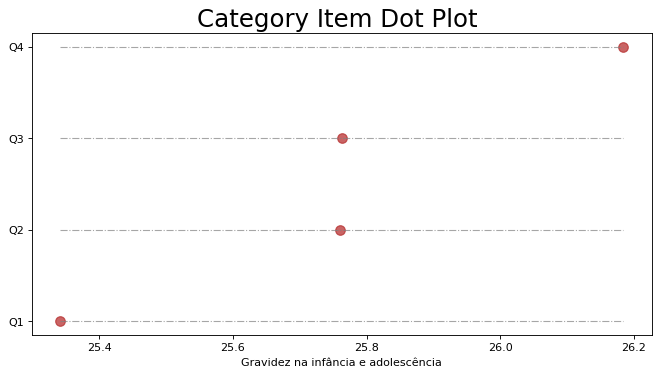

In [107]:
cat = "indriscocat"
inidicator = "Gravidez na infância e adolescência"
plot_dot_cat_item(dataset, cat, inidicator)

In [108]:
indicators = ["Gravidez na infância e adolescência"]
get_inds_groupedby_year_and_cat(indicators)

Gravidez na infância e adolescência                  
indriscocat                                  Q1    Q2    Q3    Q4
ano                                                              
2014                                       26.7  27.3  27.7  28.5
2018                                       25.3  25.6  25.8  26.9
2021                                       24.0  24.4  23.8  23.2

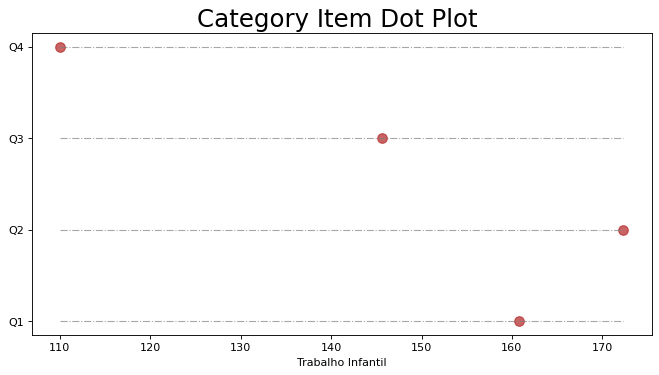

In [97]:
cat = "indriscocat"
inidicator = "Trabalho Infantil"
plot_dot_cat_item(dataset, cat, inidicator)

In [96]:
indicators = ["Trabalho Infantil"]
get_inds_groupedby_year_and_cat(indicators)

Trabalho Infantil                     
indriscocat                Q1     Q2     Q3     Q4
ano                                               
2014                    293.9  339.6  279.2  215.5
2018                    147.1  144.7  126.0   93.5
2021                     41.4   32.7   31.8   20.9

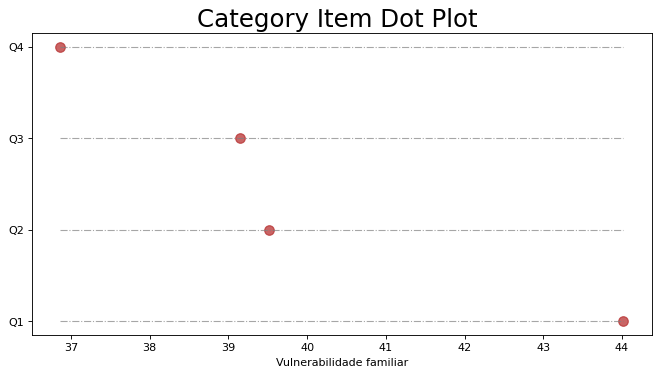

In [111]:
cat = "indriscocat"
inidicator = "Vulnerabilidade familiar"
plot_dot_cat_item(dataset, cat, inidicator)

In [110]:
indicators = ["Vulnerabilidade familiar"]
get_inds_groupedby_year_and_cat(indicators)

Vulnerabilidade familiar                  
indriscocat                       Q1    Q2    Q3    Q4
ano                                                   
2014                            38.6  35.0  34.5  34.5
2018                            43.6  41.0  40.0  36.4
2021                            49.8  42.6  42.9  39.7

__Risk Fire vs "Tolerância e inclusão" SPI Indicator__

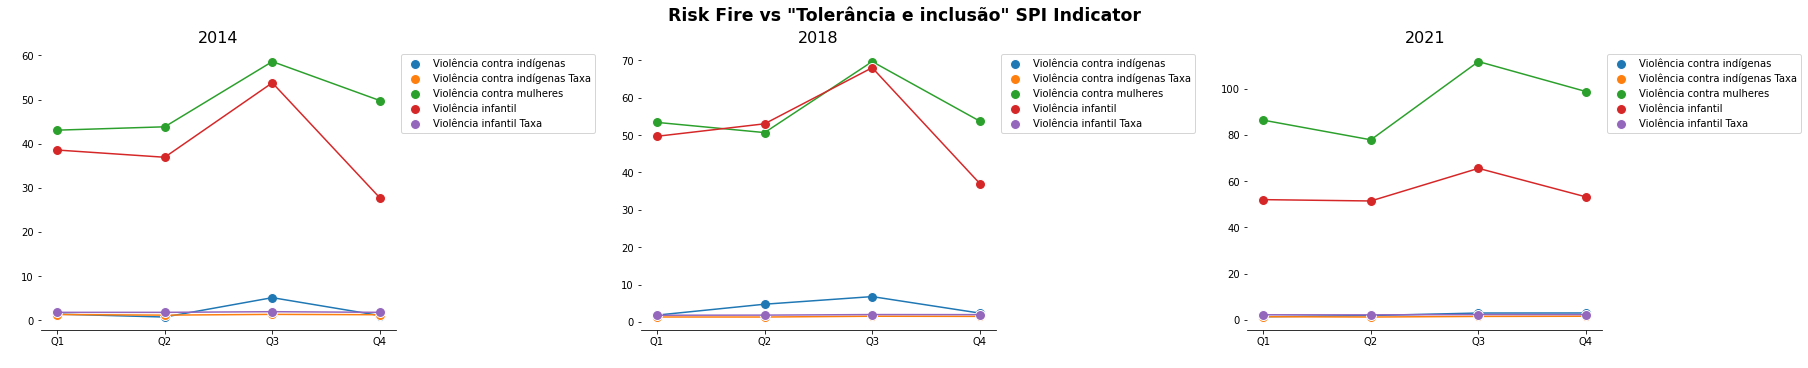

In [51]:
features_names = ["indriscocat", "Violência contra indígenas", "Violência contra indígenas Taxa", "Violência contra mulheres", "Violência infantil", "Violência infantil Taxa"]
plot_label_x_features(features_names, "Risk Fire vs \"Tolerância e inclusão\" SPI Indicator")

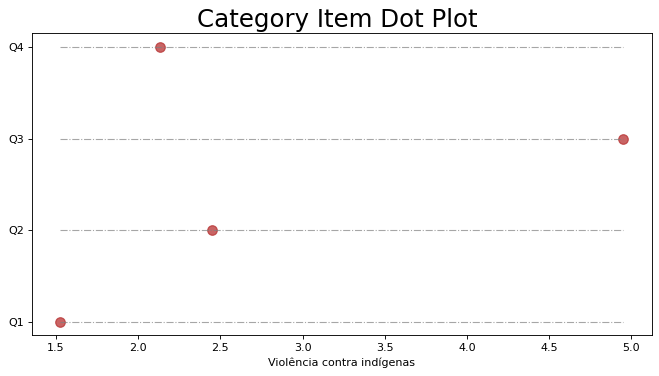

In [99]:
cat = "indriscocat"
inidicator = "Violência contra indígenas"
plot_dot_cat_item(dataset, cat, inidicator)

In [98]:
indicators = ["Violência contra indígenas"]
get_inds_groupedby_year_and_cat(indicators)

Violência contra indígenas               
indriscocat                         Q1   Q2   Q3   Q4
ano                                                  
2014                               1.4  0.7  5.1  1.1
2018                               1.8  4.7  6.8  2.4
2021                               1.4  1.9  2.9  3.0

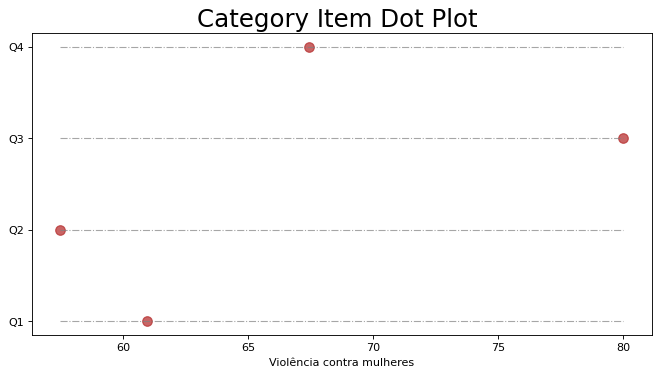

In [101]:
cat = "indriscocat"
inidicator = "Violência contra mulheres"
plot_dot_cat_item(dataset, cat, inidicator)

In [100]:
indicators = ["Violência contra mulheres"]
get_inds_groupedby_year_and_cat(indicators)

Violência contra mulheres                   
indriscocat                        Q1    Q2     Q3    Q4
ano                                                     
2014                             43.1  43.8   58.6  49.8
2018                             53.4  50.7   69.7  53.7
2021                             86.4  77.9  111.7  98.8

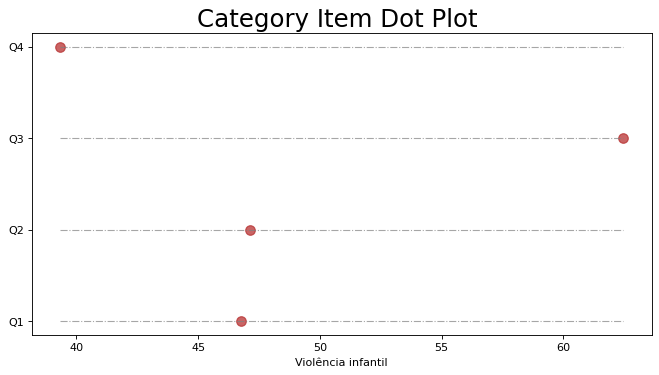

In [102]:
cat = "indriscocat"
inidicator = "Violência infantil"
plot_dot_cat_item(dataset, cat, inidicator)

In [103]:
indicators = ["Violência infantil"]
get_inds_groupedby_year_and_cat(indicators)

Violência infantil                  
indriscocat                 Q1    Q2    Q3    Q4
ano                                             
2014                      38.6  36.9  53.8  27.7
2018                      49.7  53.0  68.1  37.0
2021                      52.0  51.4  65.5  53.2

#### Risk Fire vs "Acesso à educação superior" SPI Indicator

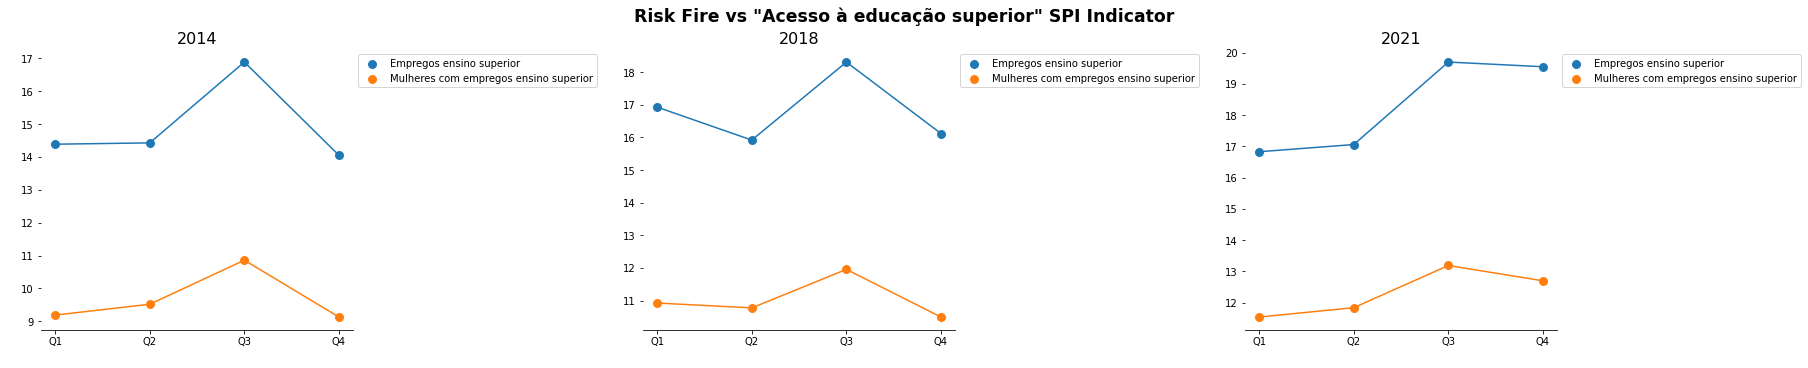

In [52]:
features_names = ["indriscocat",  "Empregos ensino superior", "Mulheres com empregos ensino superior"]
plot_label_x_features(features_names, "Risk Fire vs \"Acesso à educação superior\" SPI Indicator")

__Plot pairwise "Empregos ensino superior", "Mulheres com empregos ensino superior" indicators__

<Figure size 2400x640 with 0 Axes>

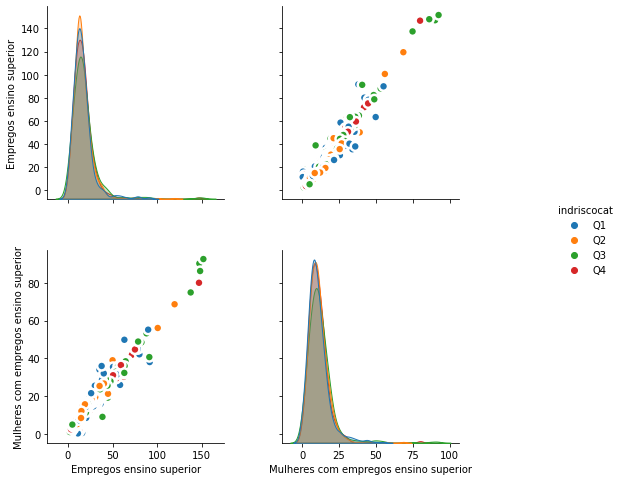

In [53]:
hue_order = ["Q1", "Q2", "Q3", "Q4"]
df = dataset[["indriscocat",  "Empregos ensino superior", "Mulheres com empregos ensino superior"]]
plot_pairwise(df, hue="indriscocat", hue_order=hue_order)

In [54]:
indicators = ["indriscocat", "Empregos ensino superior", "Mulheres com empregos ensino superior"]
get_inds_groupedby_year_and_cat(indicators)

indriscocat             Empregos ensino superior              \
indriscocat          Q1  Q2  Q3  Q4                       Q1    Q2    Q3   
ano                                                                        
2014                 Q1  Q2  Q3  Q4                     14.4  14.4  16.9   
2018                 Q1  Q2  Q3  Q4                     16.9  15.9  18.3   
2021                 Q1  Q2  Q3  Q4                     16.8  17.1  19.7   

                  Mulheres com empregos ensino superior                    
indriscocat    Q4                                    Q1    Q2    Q3    Q4  
ano                                                                        
2014         14.0                                   9.2   9.5  10.9   9.1  
2018         16.1                                  10.9  10.8  12.0  10.5  
2021         19.6                                  11.5  11.8  13.2  12.7

### Correlation beetwen features of the cities that burn the most

In [55]:
# list_biggest = []
# for year in YEARS_AVAILABLE:
#     dasy = dataset[dataset.ano == year]
#     list_biggest.append(dasy.sort_values(by=["fococalor"], ascending=False)[:20])
    
# biggest_df = pd.concat(list_biggest)

# ## plot pair correlation beetween featres.
# sns.set_theme(style="ticks")
# sns.pairplot(dataset)

In [56]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

# df = dataset[[ "indrisco",
#             "Mortalidade infantil até 5 anos", "Mortalidade materna", "Mortalidade por desnutrição", "Mortalidade por doenças infecciosas", "Subnutrição", 
#             "Abastecimento de água", "Esgotamento sanitário", "Índice de atendimento de agua",
#             "Coleta de lixo", "Moradias com iluminação adequada", "Moradias com parede adequada", "Moradias com piso adequado",
#             "Assassinatos de jovens", "Assassinatos de jovens Taxa", "Homicídios", "Homicídios Taxa", "Mortes por acidente no trânsito",

#             "Abandono escolar ensino fundamental", "Distorção idade-série ensino fundamental", "Distorção idade-série ensino médio", "Qualidade da educação Ideb ensino fundamental", "Reprovação escolar ensino fundamental",
#             "Densidade internet banda-larga", "Densidade telefonia fixa", "Densidade telefonia movel", "Densidade TV por assinatura",
#             "Mortalidade por diabetes mellitus", "Mortalidade por câncer", "Mortalidade por doenças circulatórias", "Mortalidade por doenças respiratórias", "Mortalidade por suicídios",
#             "Áreas Protegidas", "Desmatamento acumulado", "Desmatamento recente", "Emissões CO2", "Focos de calor por habitantes", 

#             "Diversidade Partidária", "Transporte Público", 
#             "Acesso à cultura, esporte e lazer", "Gravidez na infância e adolescência", "Trabalho Infantil" , "Vulnerabilidade familiar",
#             "Violência contra indígenas", "Violência contra indígenas Taxa", "Violência contra mulheres", "Violência infantil", "Violência infantil Taxa",
#             "Empregos ensino superior", "Mulheres com empregos ensino superior"
#         ]]

# df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)

# sns.set_theme(style="ticks")
# sns.pairplot(df_scaled)

### Get top Amazon IPS cities

In [57]:
def get_top_spi(dataset, head=10, ascending=True): 
    df = dataset.copy()
    df["regiao"] = df[['municipio', 'estado']].agg(' - '.join, axis=1)
    group = df.groupby("regiao")
    return group['IPS Amazônia'].sum().sort_values(ascending=ascending)[:head]


def get_max_spi(dataset, year):
    max_spi = dataset[(dataset["ano"] == year)]["IPS Amazônia"].max()
    return dataset[(dataset["ano"] == year) & (dataset["IPS Amazônia"] == max_spi)]


def get_min_spi(dataset, year):
    min_spi = dataset[(dataset["ano"] == year)]["IPS Amazônia"].min()
    return dataset[(dataset["ano"] == year) & (dataset["IPS Amazônia"] == min_spi)]


def plot_top_spi(dataset, how_many=10, ascending=True):
    cols = 3
    rows = math.ceil(len(YEARS_AVAILABLE) / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(25, 5), constrained_layout=True)

    title = "Cities with {} Amazon SPI per year".format("Fewer" if ascending else "Biggest")
    fig.suptitle(title, fontsize="xx-large", fontweight='heavy')

    for idx, ax in enumerate(axes):
        year = YEARS_AVAILABLE[idx]
        yeardf = dataset[(dataset["ano"] == year)]
        tt = get_top_spi(yeardf, head=how_many, ascending=ascending)

        ax.set_title(year, fontdict={'fontsize': 16})
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        
        # Remove axes splines
        for spin in ['top', 'left', 'right']:
            ax.spines[spin].set_visible(False)
            
        sns.histplot(data=tt, y=tt.index, weights=tt.values, ax=ax)

#### List of minors SPImazon spi cities

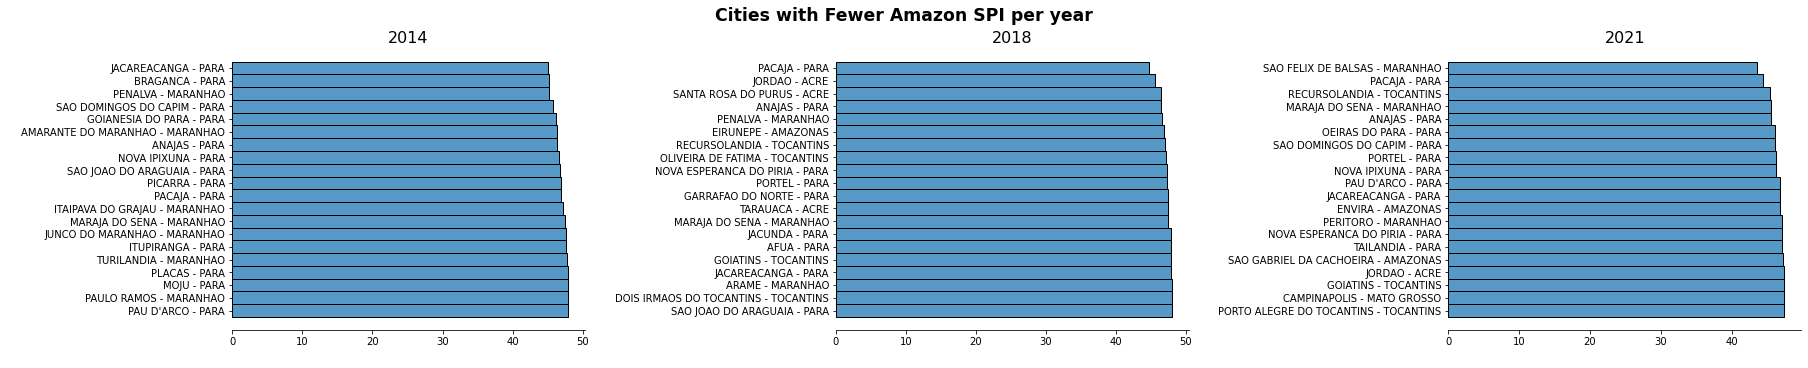

In [58]:
plot_top_spi(dataset, how_many=20, ascending=True)

#### List of maijors SPImazon spi cities

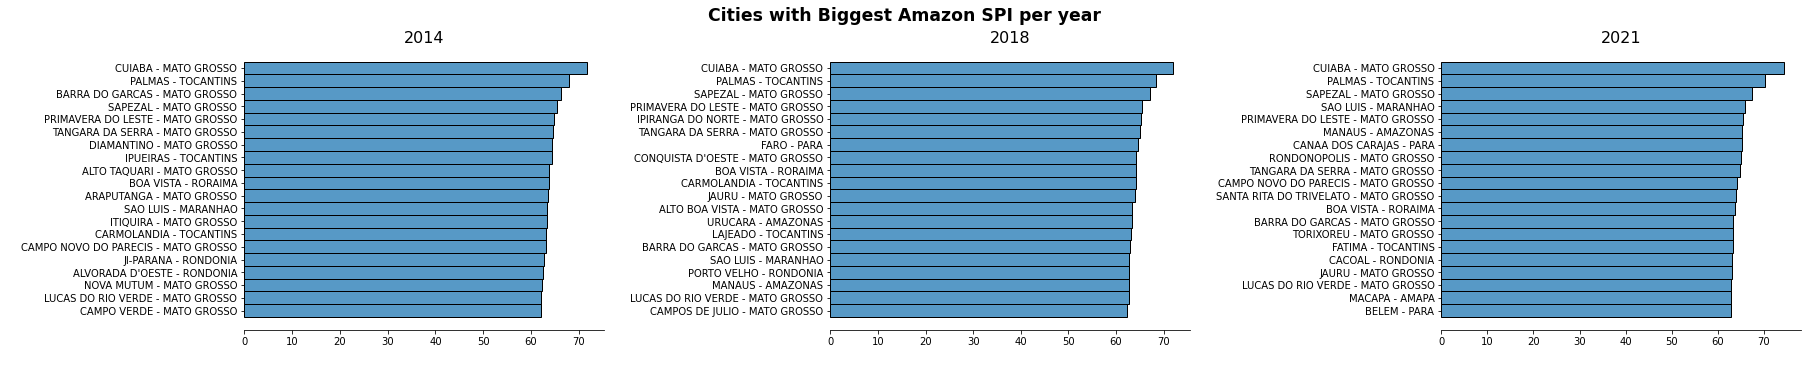

In [59]:
plot_top_spi(dataset, how_many=20, ascending=False)

#### List of cities below the ips average and which burned the most

In [60]:
year = 2021
mean =  dataset["Media IPS"]
low_spi_mean = dataset[(dataset["IPS Amazônia"] > mean) & (dataset["ano"] == year)]
low_spi_mean.sort_values(by=["fococalor"], ascending=[False])

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,indrisco,indriscocat,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
1915,2021,MATO GROSSO,POCONE,11.6,1.33,0.69,8.99,220697,153764.77,Q4,...,20.36,1.18,39.92,0.00,1.0,31.46,12.41,2.0,21.71,16.47
1841,2021,MATO GROSSO,CACERES,11.5,1.42,0.70,9.24,160711,113671.71,Q4,...,19.84,0.73,73.24,2.71,3.0,98.98,118.38,3.0,43.40,25.37
1836,2021,MATO GROSSO,BARAO DE MELGACO,32.2,0.57,0.88,12.19,111076,99007.26,Q4,...,26.09,33.64,43.48,0.00,1.0,0.00,0.00,1.0,10.28,5.00
1854,2021,MATO GROSSO,COLNIZA,14.1,1.47,0.66,8.37,69598,46861.98,Q4,...,20.34,20.95,19.61,0.00,1.0,24.29,16.01,2.0,15.32,10.06
1911,2021,MATO GROSSO,PARANATINGA,44.6,0.60,0.81,11.00,49023,40091.53,Q4,...,20.98,1.93,28.34,0.00,1.0,96.31,42.55,3.0,17.37,10.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,2021,PARA,BENEVIDES,2.6,2.86,0.09,3.09,24,2.34,Q1,...,23.02,27.18,55.36,0.00,1.0,4.26,0.00,1.0,19.86,11.62
1577,2021,AMAPA,SERRA DO NAVIO,2.0,4.86,0.06,5.59,8,0.58,Q1,...,16.30,101.91,61.96,0.00,1.0,26.11,0.00,1.0,5.00,5.00
2259,2021,TOCANTINS,NOVO ALEGRE,4.1,1.10,0.59,8.99,7,4.17,Q1,...,14.29,5.23,57.14,0.00,1.0,147.13,133.08,3.0,9.43,7.72
1972,2021,PARA,ANANINDEUA,2.4,3.86,0.06,7.92,5,0.35,Q1,...,15.63,2.41,60.04,1.14,2.0,56.02,177.22,4.0,19.63,12.06


In [61]:
year = 2021
low_of_spi_mean = dataset[(dataset["IPS Amazônia"] < dataset["Media IPS"]) & (dataset["ano"] == year)]
low_of_spi_mean.sort_values(by="fococalor", ascending=False)

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,indrisco,indriscocat,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
2082,2021,PARA,SAO FELIX DO XINGU,17.6,1.22,0.73,8.54,114830,84439.70,Q4,...,27.81,6.39,19.07,0.00,1.0,0.58,0.00,1.0,6.87,5.00
1970,2021,PARA,ALTAMIRA,16.9,0.72,0.75,8.78,113039,85608.79,Q4,...,21.21,11.35,18.94,2.72,3.0,632.00,500.00,5.0,16.19,9.98
2058,2021,PARA,PORTEL,3.4,1.60,0.38,6.32,83141,32638.41,Q4,...,29.83,285.67,17.78,0.00,1.0,1.10,1.37,2.0,16.92,10.49
2049,2021,PARA,PACAJA,3.8,1.71,0.44,7.72,59812,26694.82,Q4,...,26.29,1.48,17.40,41.67,5.0,39.04,26.43,2.0,8.01,5.32
1835,2021,MATO GROSSO,ARIPUANA,17.1,1.00,0.70,9.16,52212,36903.22,Q4,...,24.52,10.06,41.05,6.68,3.0,211.66,94.91,3.0,27.74,17.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2021,TOCANTINS,AXIXA DO TOCANTINS,8.1,1.23,0.59,2.19,75,44.95,Q1,...,21.08,44.48,67.57,0.00,1.0,13.61,25.50,2.0,25.63,18.04
1674,2021,MARANHAO,CAJAPIO,4.4,0.38,0.55,5.58,60,33.70,Q1,...,29.41,69.95,43.79,0.00,1.0,11.96,0.00,1.0,10.56,6.89
2261,2021,TOCANTINS,OLIVEIRA DE FATIMA,5.9,0.85,0.55,4.88,59,33.29,Q1,...,14.29,0.00,28.57,0.00,1.0,64.35,0.00,1.0,37.77,35.97
1610,2021,AMAZONAS,JAPURA,0.9,2.47,0.02,4.24,42,1.22,Q1,...,28.93,65.66,60.33,0.25,2.0,122.13,148.87,4.0,5.00,5.00


### Visualize the correlation in a matrix

In [62]:
# def show_heatmap_corr(dataset):
#     fig, ax = plt.subplots(figsize=(50,50))
#     sns.heatmap(
#         dataset.corr(), 
#         vmax=1.0, 
#         center=0, 
#         fmt='.2f',
#         square=True, 
#         linewidths=.5, 
#         annot=True, 
#         cbar_kws={"shrink": .70}
#     )
# show_heatmap_corr(dataset)